## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

## Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

<hr style="border: none; border-bottom: 3px solid red;">

# Load packages

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier


import statistics
pd.set_option('display.max_columns' ,None)

<hr style="border: none; border-bottom: 3px solid red;">

# Load data & overview

In [ ]:
# Loading the dataset
BankChurners = pd.read_csv("BankChurners.csv")
data=BankChurners.copy()

In [ ]:
data.sample(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
4074  772204758  Existing Customer            42      F                2   
7193  711540108  Attrited Customer            44      F                4   
1528  708347583  Existing Customer            37      F                4   
5541  709505808  Attrited Customer            45      F                3   
6751  719362458  Existing Customer            47      F                3   
6747  720133908  Existing Customer            41      M                2   
8800  718189908  Existing Customer            44      F                4   
6786  719350908  Existing Customer            43      M                4   
8019  713160258  Existing Customer            54      F                2   
7717  778781508  Attrited Customer            44      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
4074   Post-Graduate        Unknown  Less than $40K          Blue   
7193       Doctorate        Unknown         Unknown          Blue   
1528      Uneducated        Married  Less than $40K          Blue   
5541         College         Single         Unknown          Blue   
6751     High School        Married  Less than $40K          Blue   
6747   Post-Graduate         Single     $40K - $60K          Blue   
8800         Unknown        Unknown     $40K - $60K          Gold   
6786         Unknown        Unknown  Less than $40K          Blue   
8019        Graduate        Married  Less than $40K          Blue   
7717     High School        Married         Unknown          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
4074              31                         3                       2   
7193              33                         5                       3   
1528              36                         4                       1   
5541              33                         5                       3   
6751              36                         5                       3   
6747              27                         4                       1   
8800              31                         2                       2   
6786              35                         3                       3   
8019              44                         1                       2   
7717              32                         4                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
4074                      2       3809.00                 1165   
7193                      6       1438.30                    0   
1528                      4       2509.00                 1144   
5541                      4       4345.00                 2198   
6751                      3       2822.00                    0   
6747                      3       4461.00                  900   
8800                      3      23981.00                 2135   
6786                      2       4177.00                 2094   
8019                      3       3034.00                 2033   
7717                      3       8477.00                 2517   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
4074          2644.00                  0.63             2306              46   
7193          1438.30                  0.68             2316              48   
1528          1365.00                  0.69             1804              38   
5541          2147.00                  0.47             1918              31   
6751          2822.00                  0.68             5064              74   
6747          3561.00                  0.59             4204              77   
8800         21846.00                  0.75             7885              86   
6786          2083.00                  0.47             3553              66   
8019          1001.00                  0.64             4349              90   
7717          5960.00                  0.72             2455       

In [ ]:
data.shape

(10127, 21)

In [ ]:
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count     10127.00      10127.00         10127.00        10127.00   
mean  739177606.33         46.33             2.35           35.93   
std    36903783.45          8.02             1.30            7.99   
min   708082083.00         26.00             0.00           13.00   
25%   713036770.50         41.00             1.00           31.00   
50%   717926358.00         46.00             2.00           36.00   
75%   773143533.00         52.00             3.00           40.00   
max   828343083.00         73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count             10127.00               10127.00  
mean                  0.71                   0.27  
std                   0.24                   0.28  
min                   0.00                   0.00  
25%                   0.58                   0.02  
50%                   0.70                   0.18  
75%                   0.82                   0.50  
max                   3.71                   1.00

In [ ]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* there is no missing value in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* there are 20 columns and 10127 rows (observation) in the data set
* there is no missing values in the data set

In [ ]:
for c in enumerate(data.columns):
    if data[c[1]].dtype=='object':
        print(data[c[1]].value_counts().astype(str)+' - '+(round(data[c[1]].value_counts(normalize=True)*100,2)).astype(str)+'%')
        print("*"*50)
    

Existing Customer    8500 - 83.93%
Attrited Customer    1627 - 16.07%
Name: Attrition_Flag, dtype: object
**************************************************
F    5358 - 52.91%
M    4769 - 47.09%
Name: Gender, dtype: object
**************************************************
Graduate         3128 - 30.89%
High School      2013 - 19.88%
Unknown           1519 - 15.0%
Uneducated       1487 - 14.68%
College           1013 - 10.0%
Post-Graduate       516 - 5.1%
Doctorate          451 - 4.45%
Name: Education_Level, dtype: object
**************************************************
Married     4687 - 46.28%
Single      3943 - 38.94%
Unknown        749 - 7.4%
Divorced      748 - 7.39%
Name: Marital_Status, dtype: object
**************************************************
Less than $40K    3561 - 35.16%
$40K - $60K       1790 - 17.68%
$80K - $120K      1535 - 15.16%
$60K - $80K       1402 - 13.84%
Unknown           1112 - 10.98%
$120K +             727 - 7.18%
Name: Income_Category, dtype: object
*

* more existing customer in the dataset
* regarding the genders is tha database almost balanced
* Graduate, High School, Unknown, Uneducated are on the first 3 postition of education level
* most of people is married but the number of singles is also very high
* to the lowest category belongs the most of people in the income_category
* 93% of the Credit cards is the blue one (the cheapest category)


### summary of the data

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe().T

count         mean         std          min  \
CLIENTNUM                10127.00 739177606.33 36903783.45 708082083.00   
Customer_Age             10127.00        46.33        8.02        26.00   
Dependent_count          10127.00         2.35        1.30         0.00   
Months_on_book           10127.00        35.93        7.99        13.00   
Total_Relationship_Count 10127.00         3.81        1.55         1.00   
Months_Inactive_12_mon   10127.00         2.34        1.01         0.00   
Contacts_Count_12_mon    10127.00         2.46        1.11         0.00   
Credit_Limit             10127.00      8631.95     9088.78      1438.30   
Total_Revolving_Bal      10127.00      1162.81      814.99         0.00   
Avg_Open_To_Buy          10127.00      7469.14     9090.69         3.00   
Total_Amt_Chng_Q4_Q1     10127.00         0.76        0.22         0.00   
Total_Trans_Amt          10127.00      4404.09     3397.13       510.00   
Total_Trans_Ct           10127.00        64.86       23.47        10.00   
Total_Ct_Chng_Q4_Q1      10127.00         0.71        0.24         0.00   
Avg_Utilization_Ratio    10127.00         0.27        0.28         0.00   

                                  25%          50%          75%          max  
CLIENTNUM                713036770.50 717926358.00 773143533.00 828343083.00  
Customer_Age                    41.00        46.00        52.00        73.00  
Dependent_count                  1.00         2.00         3.00         5.00  
Months_on_book                  31.00        36.00        40.00        56.00  
Total_Relationship_Count         3.00         4.00         5.00         6.00  
Months_Inactive_12_mon           2.00         2.00         3.00         6.00  
Contacts_Count_12_mon            2.00         2.00         3.00         6.00  
Credit_Limit                  2555.00      4549.00     11067.50     34516.00  
Total_Revolving_Bal            359.00      1276.00      1784.00      2517.00  
Avg_Open_To_Buy               1324.50      3474.00      9859.00     34516.00  
Total_Amt_Chng_Q4_Q1             0.63         0.74         0.86         3.40  
Total_Trans_Amt               2155.50      3899.00      4741.00     18484.00  
Total_Trans_Ct                  45.00        67.00        81.00       139.00  
Total_Ct_Chng_Q4_Q1              0.58         0.70         0.82         3.71  
Avg_Utilization_Ratio            0.02         0.18         0.50         1.00

### Observations
* CLIENTNUM has no additional infromation can be removed
* Customer_Age is between 26 and 73
* appr. 36 months the average relationship with the bank
* Min 1 and max 6 product pro customer existing with the bank
* Max a half year inactivity was among the customers in the last 12 months
* There were not so much contact between the customers and the bank in average 2,5 pro customer
* Credit limit on the credit cards shows big differencies the minimum is 1.438 but the maximum is 34.516
* 1.162 USD is the average balanc from one month to the next month
* 7469 USD is the average left amount on the credit card in the last 12 months but the standard deviation is relatively big more then 9k USD
* In average 28% of the credit limit had been used by the customers



### client number has no additional information have to drop it

In [ ]:
data.drop(['CLIENTNUM', 'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],axis=1,inplace=True)

* CLIENTNUM as the calculated statistical indicators have to be dropped

### summary of the object data

In [ ]:
data.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

### Observations
* Most of the customers are existing
* There are more females in the dataset
* Graduate is the most common education level
* Married are the most marital status
* the lowest income group are the most common
* the most of card category is the blue one

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

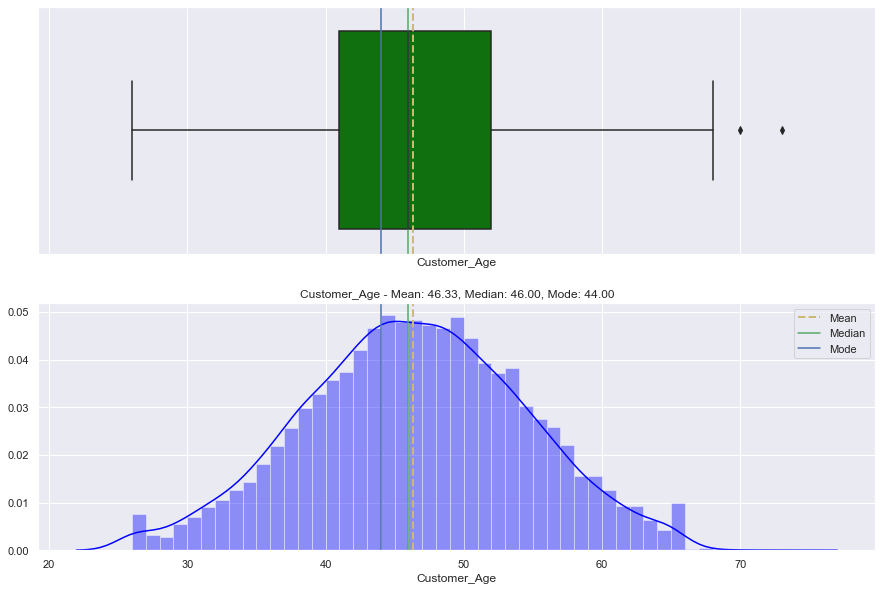

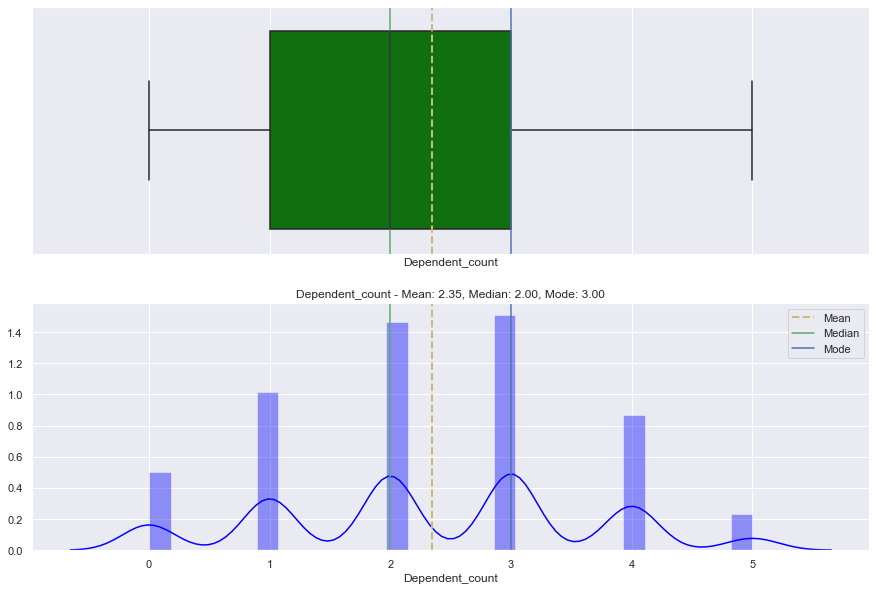

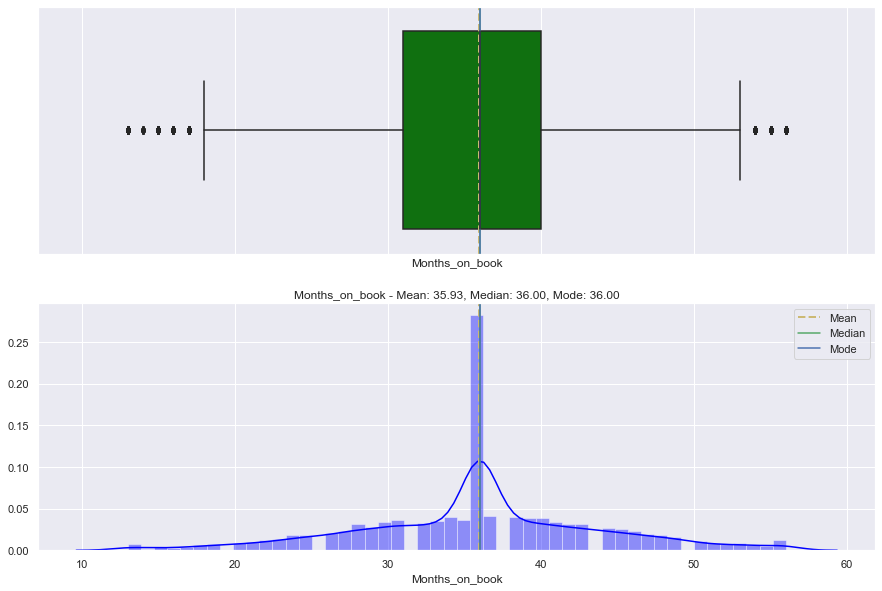

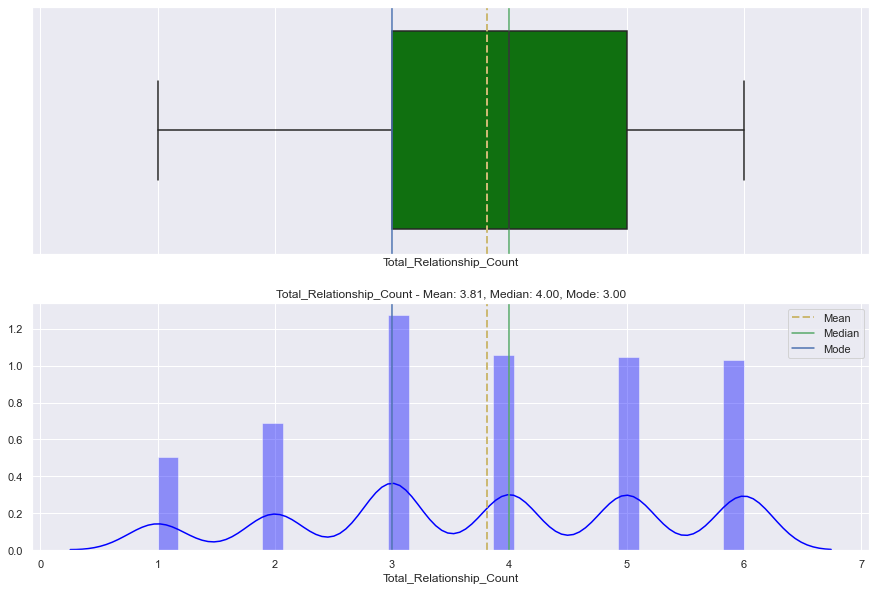

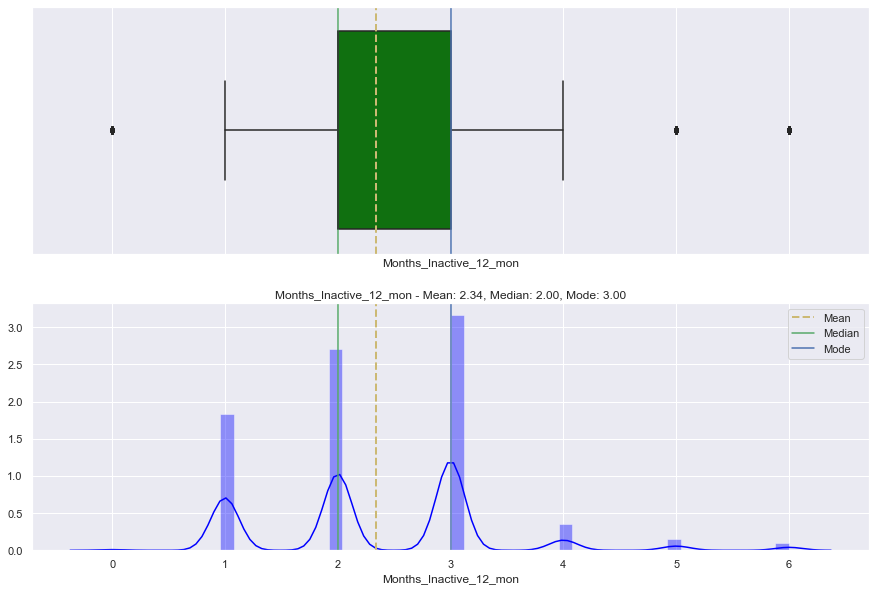

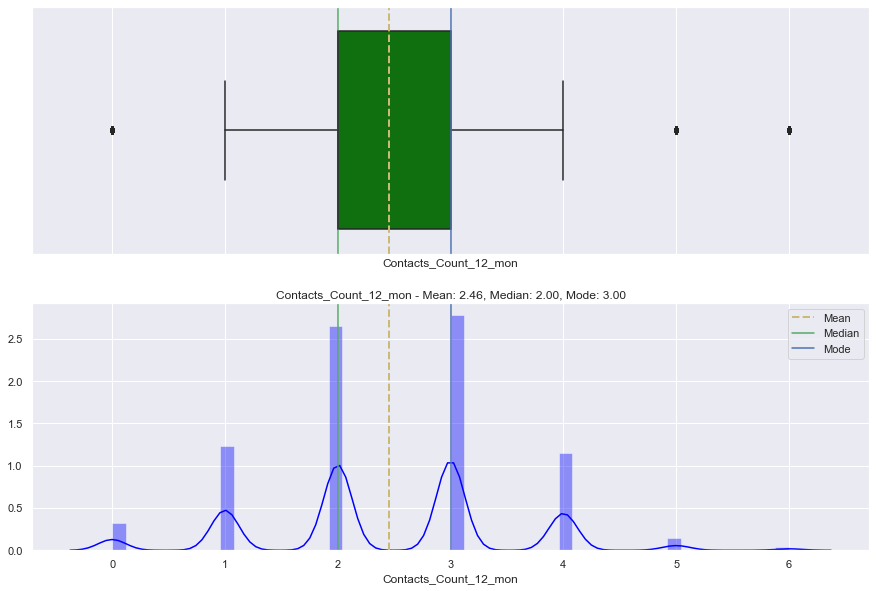

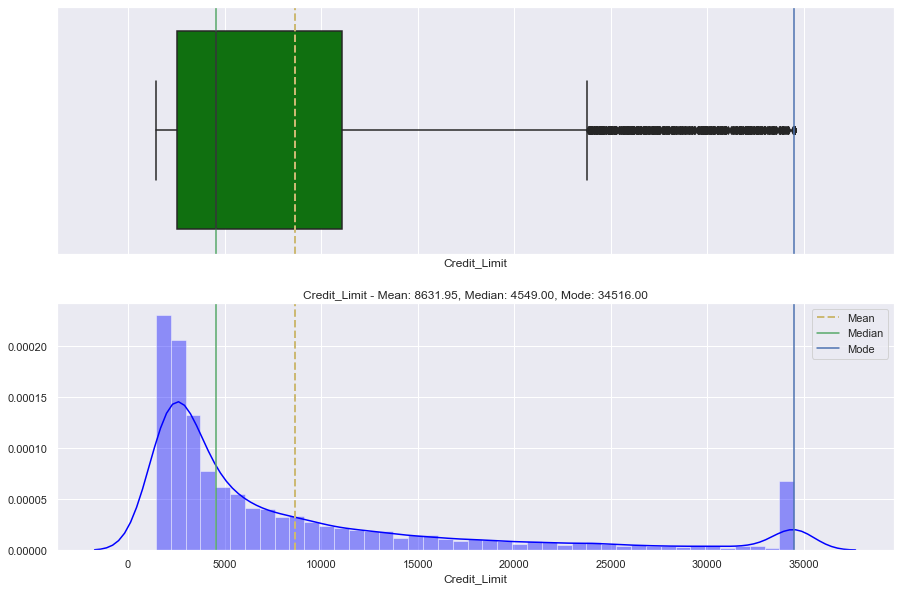

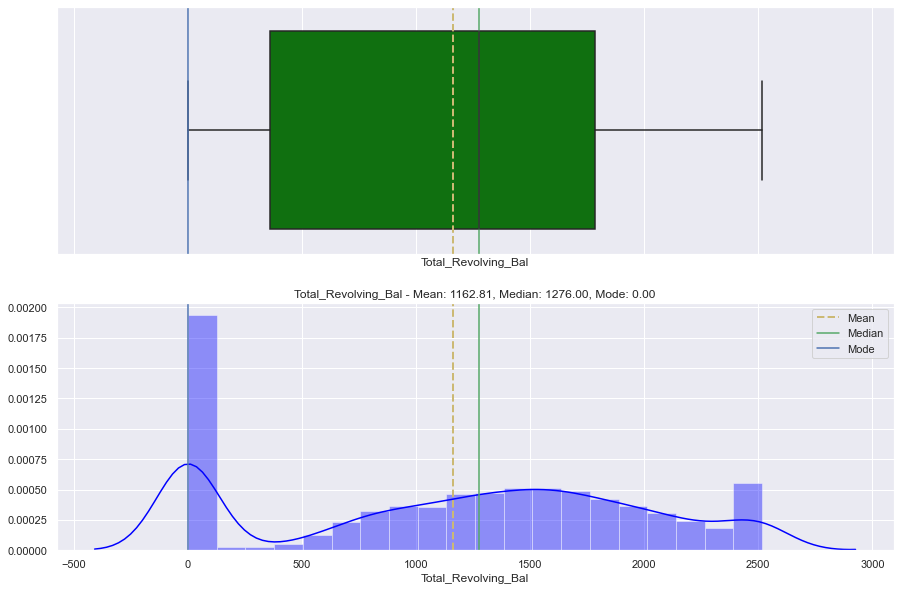

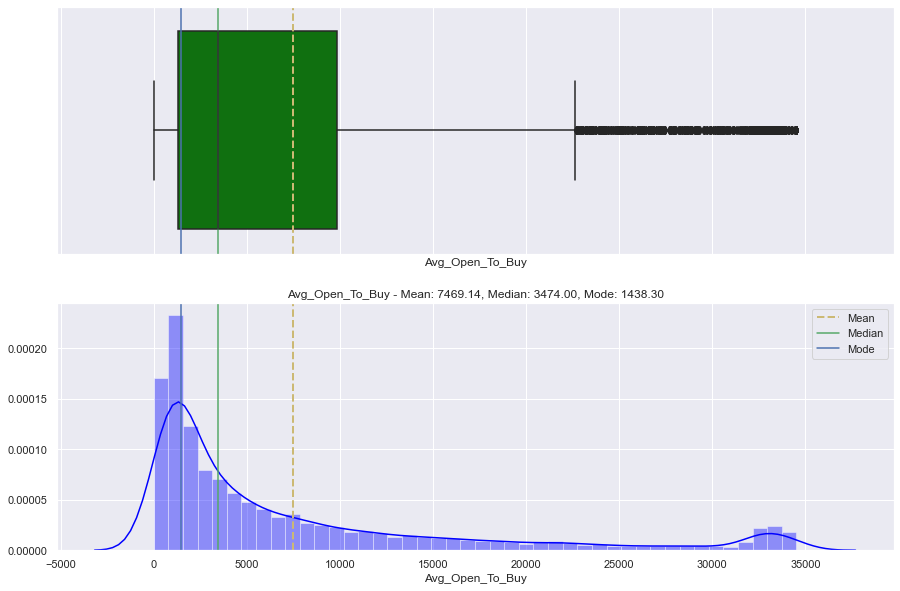

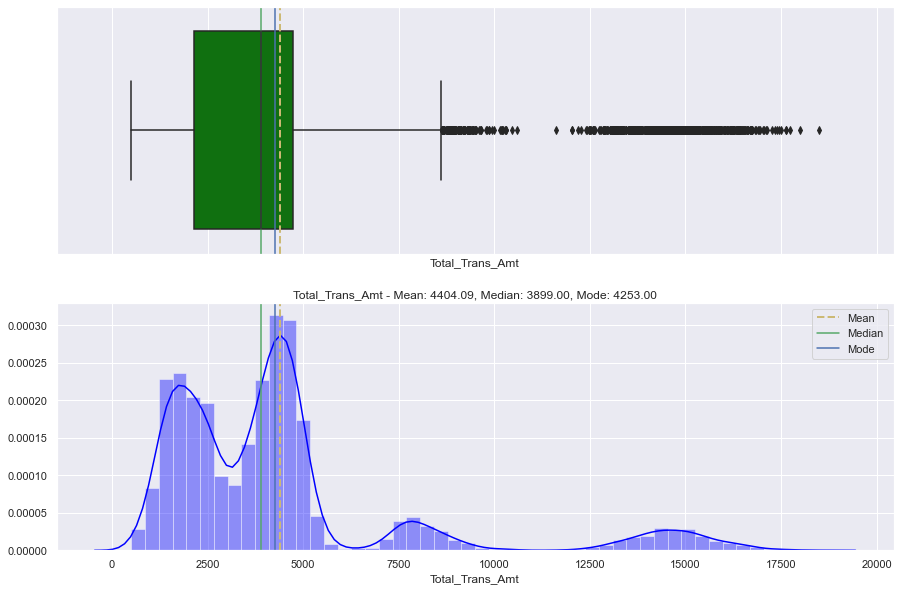

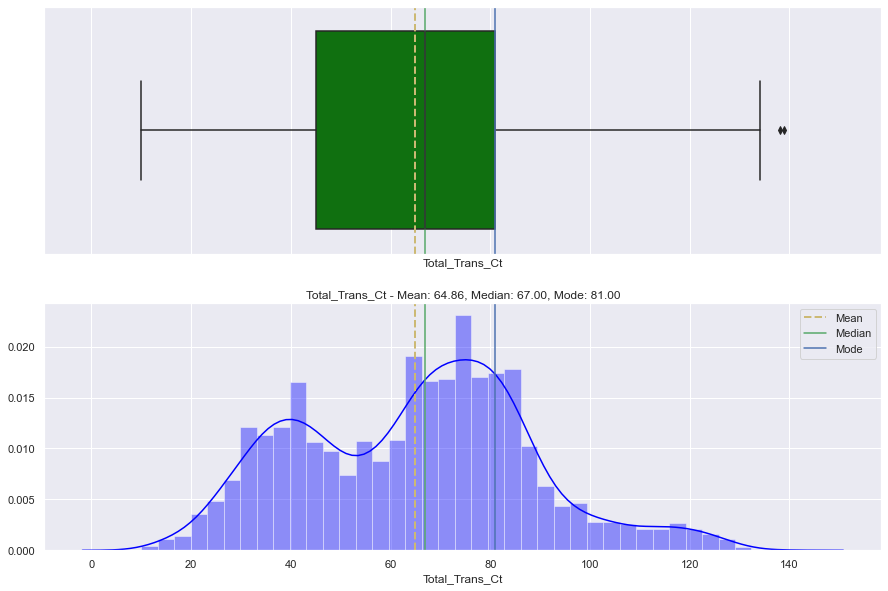

In [ ]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for index, c in enumerate(data.columns):
    if (data[c].dtype in numerics)==True:
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,10))
            mean=data[c].mean() 
            median=data[c].median()
            mode=data[c].mode()[0]
            plt.title(data[c].name + " - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}" .format(mean, median,mode))


            sns.boxplot(data[c], ax=ax_box, color='green')
            ax_box.axvline(mean, color='y', linestyle='--',linewidth=2)
            ax_box.axvline(median, color='g', linestyle='-')
            ax_box.axvline(mode, color='b', linestyle='-')

            sns.distplot(data[c], ax=ax_hist, color='blue')
            ax_hist.axvline(mean, color='y', linestyle='--', linewidth=2)
            ax_hist.axvline(median, color='g', linestyle='-')
            ax_hist.axvline(mode, color='b', linestyle='-')

            plt.legend({'Mean':mean,'Median':median,'Mode':mode})

* there are some outliers in the Customer Age, Month on book, Month inactive 12 mon, Contacts count
* more outliers in the credit limit Avg open to buy, Total amt chng, Total transaction


<Figure size 432x288 with 0 Axes>

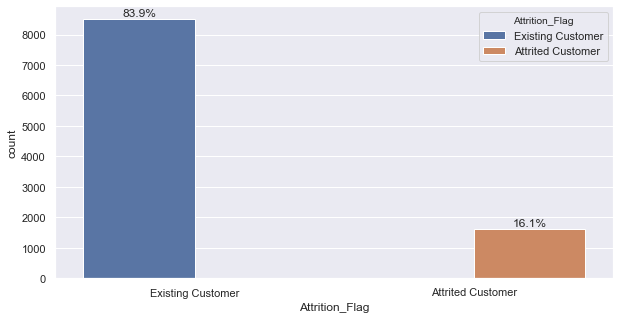

<Figure size 432x288 with 0 Axes>

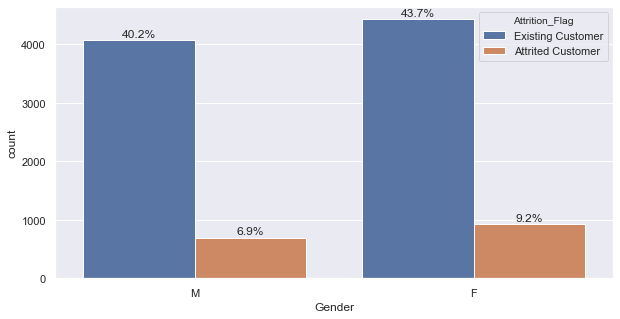

<Figure size 432x288 with 0 Axes>

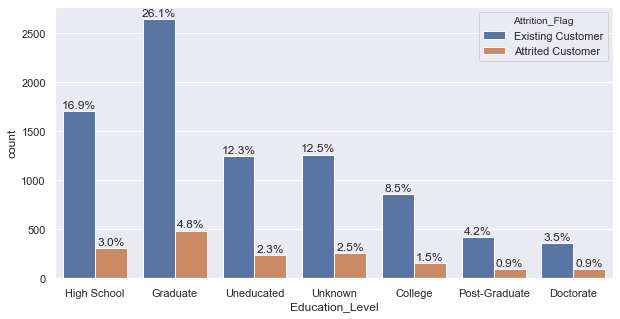

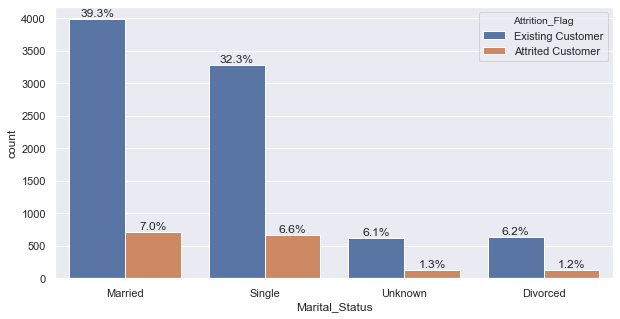

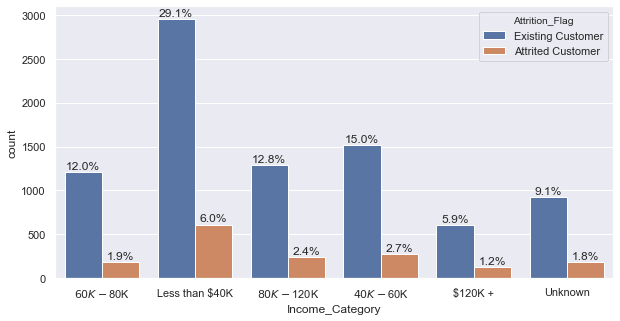

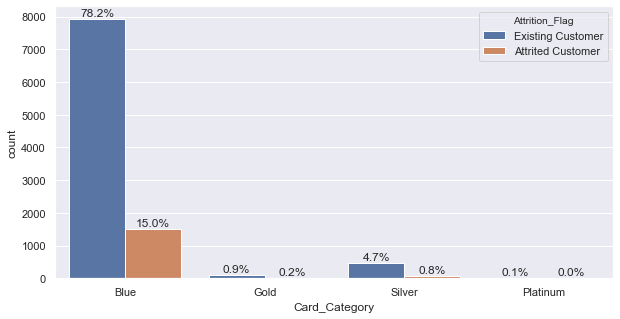

In [ ]:
dat_typ = ['object']
for i, c in enumerate(data.columns):
    if (data[c].dtype in dat_typ)==True:
        plt.figure(i)
        plt.figure(figsize=(10,5))
        ax=sns.countplot(data[c], hue=data['Attrition_Flag'])
        for p in ax.patches:
            total=len(data[c])
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
          


## Bivariate Analysis

### pairplot with hue Attrition flag

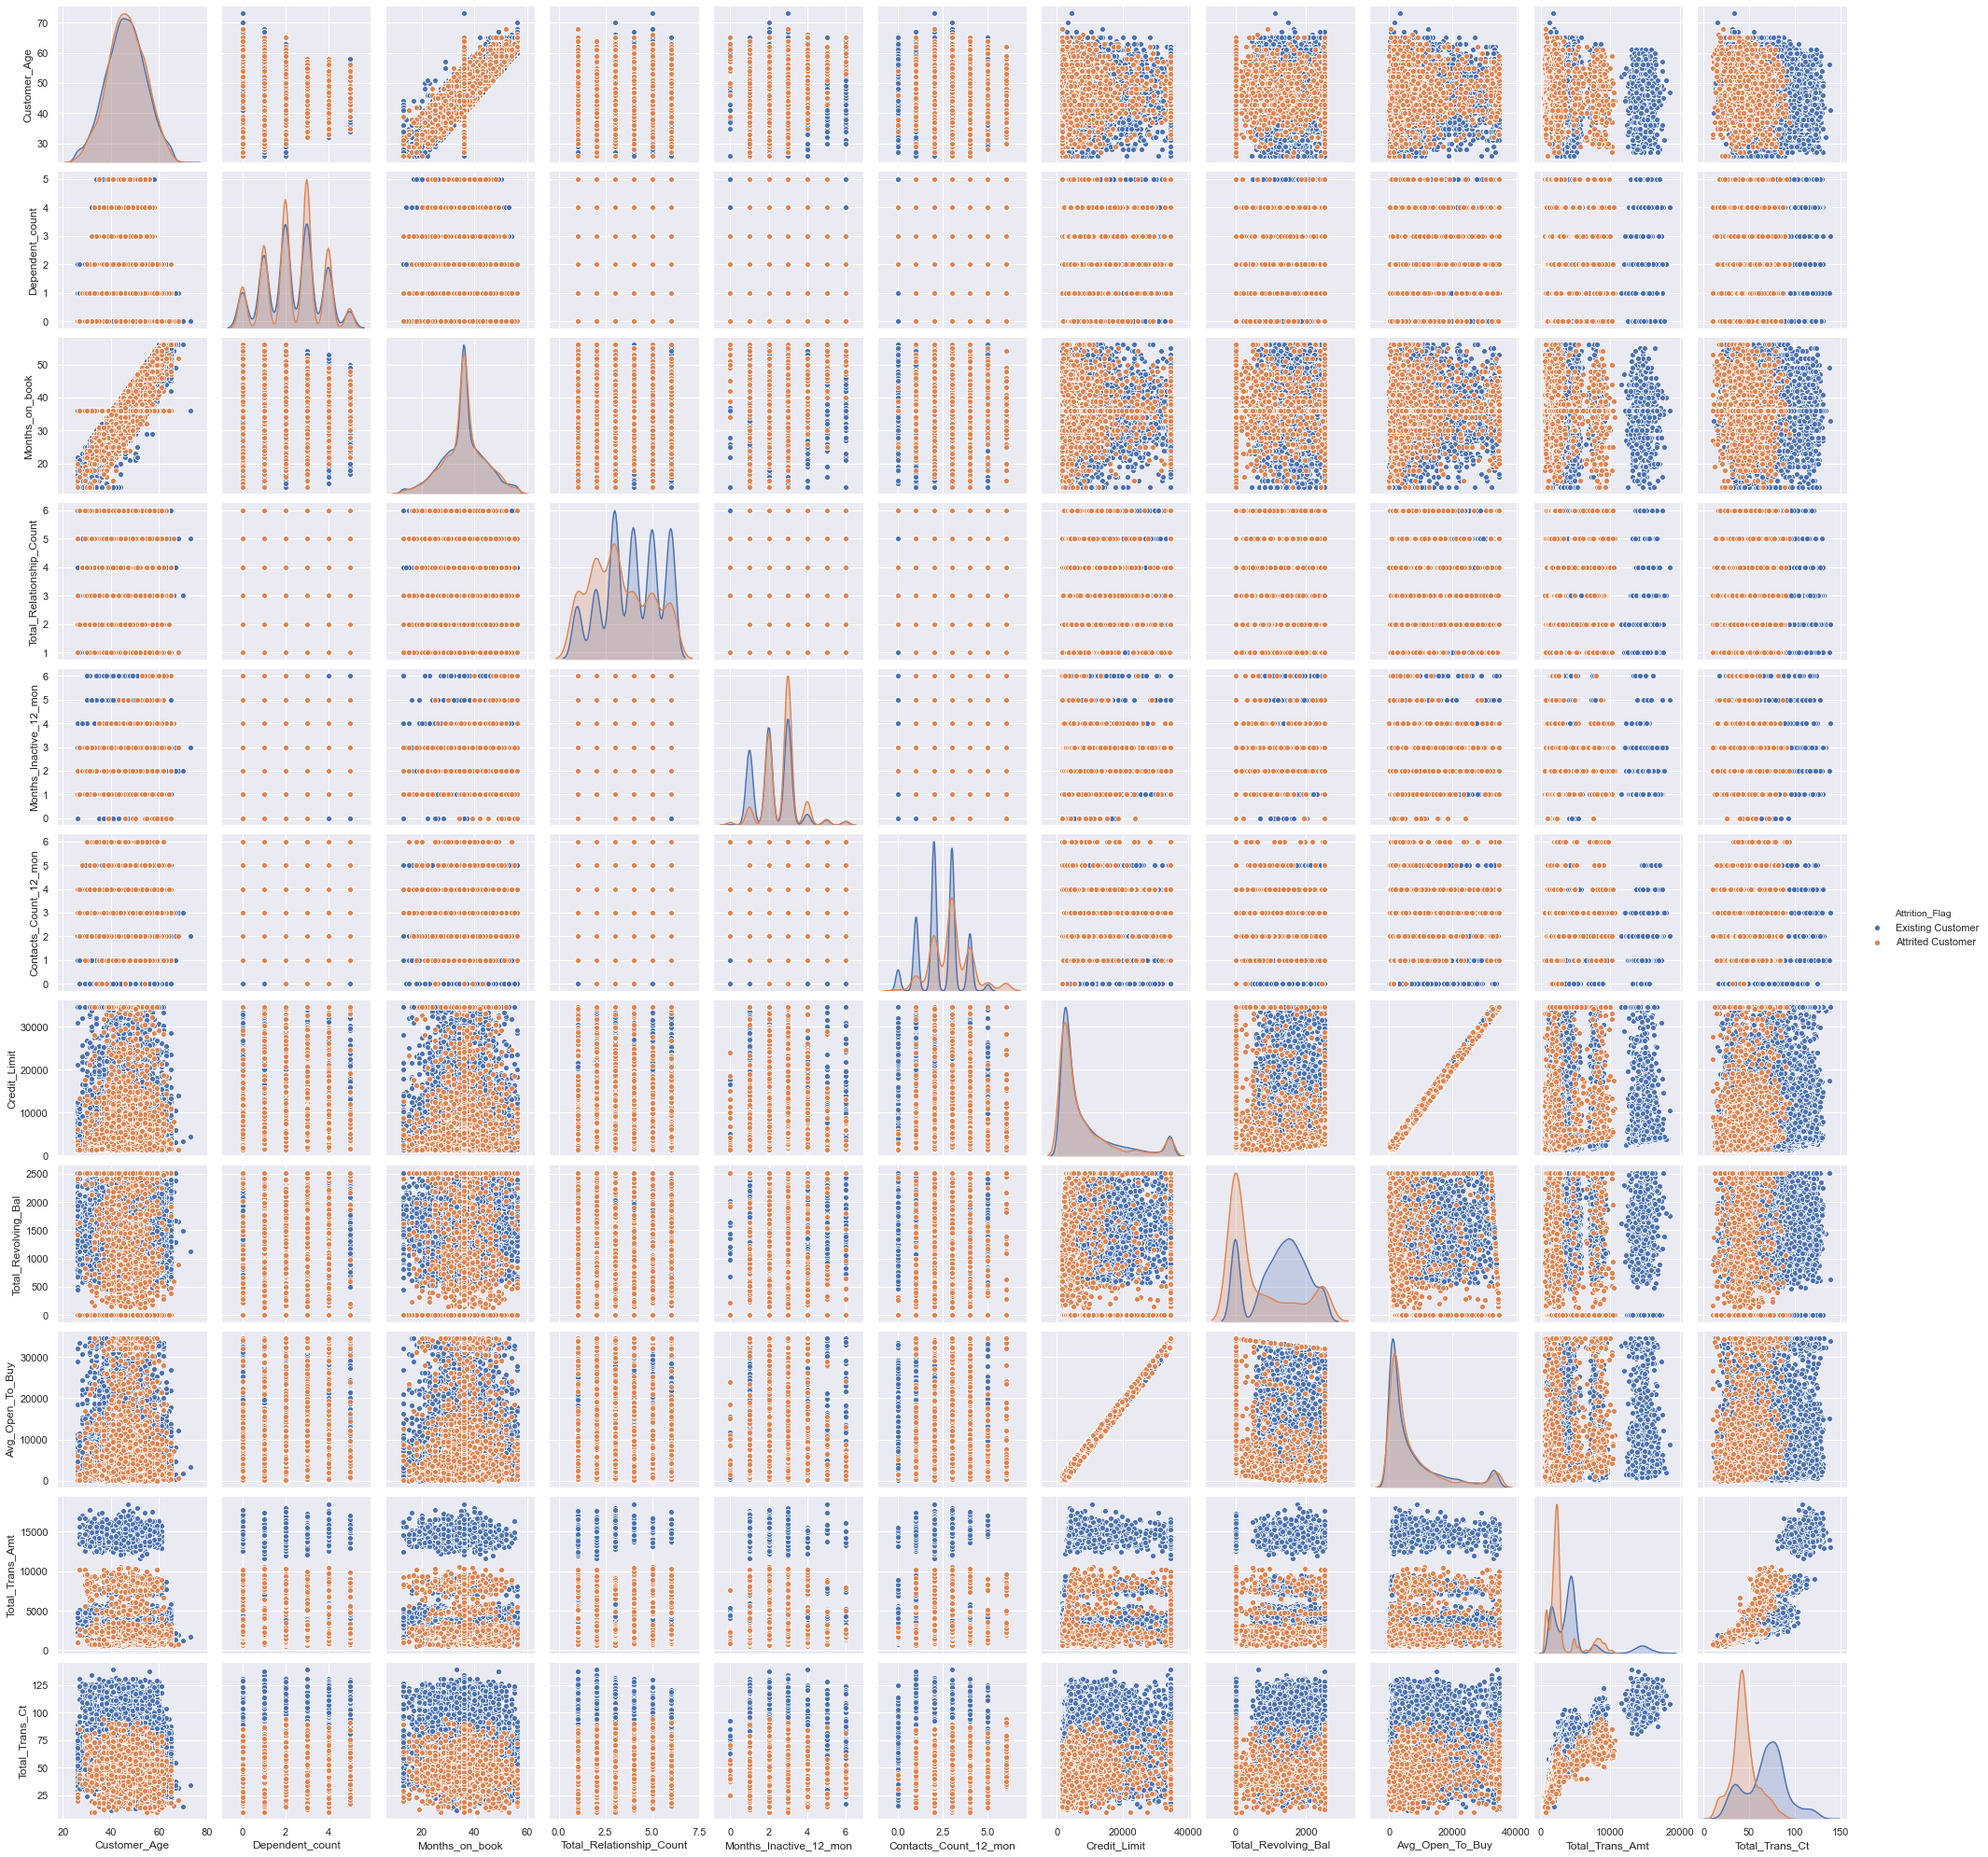

In [ ]:
sns.pairplot(data, hue='Attrition_Flag')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

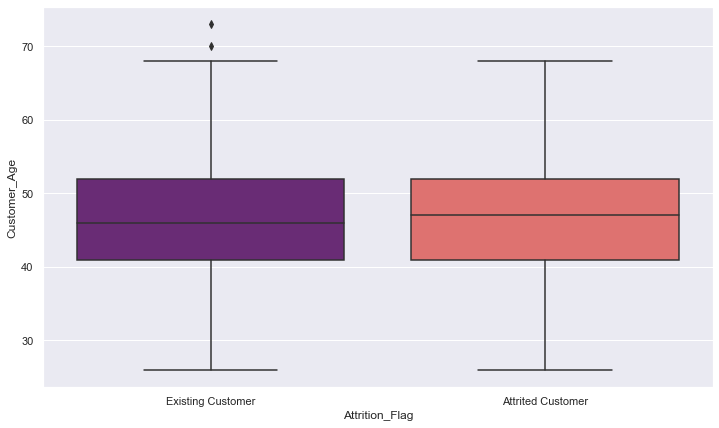

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, orient="vertical", palette='magma')

* there is no significant differencies among the customer age regarding the existing and attrited customer status

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

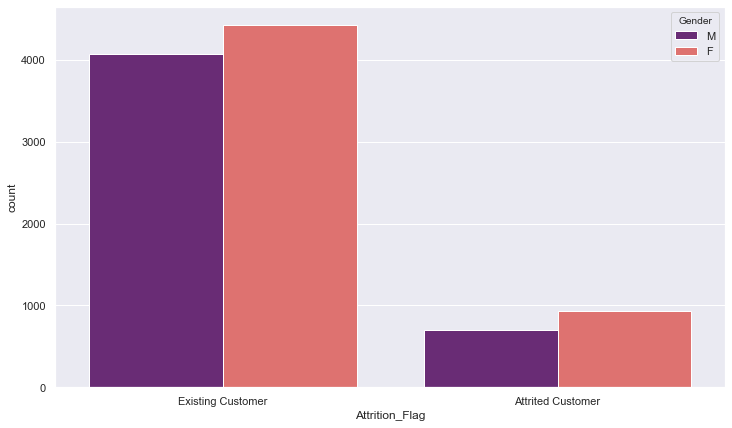

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Gender'])

In [ ]:
print("Gender distribution in te dataset\n", data['Gender'].value_counts(normalize=True)*100)

Gender distribution in te dataset
 F   52.91
M   47.09
Name: Gender, dtype: float64


* thera are more female involved in the dataset but the proportion in the attrition flag is appx is the same

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Dependent_count'>

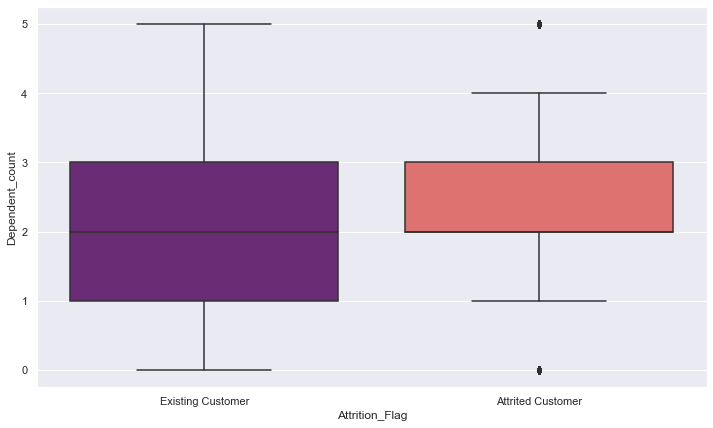

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.boxplot(x="Attrition_Flag", y="Dependent_count", data=data, orient="vertical", palette='magma')

* Number of dependents are in wider area at the existing custmers 0-5 im comparison with the attrited customers 1-4

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

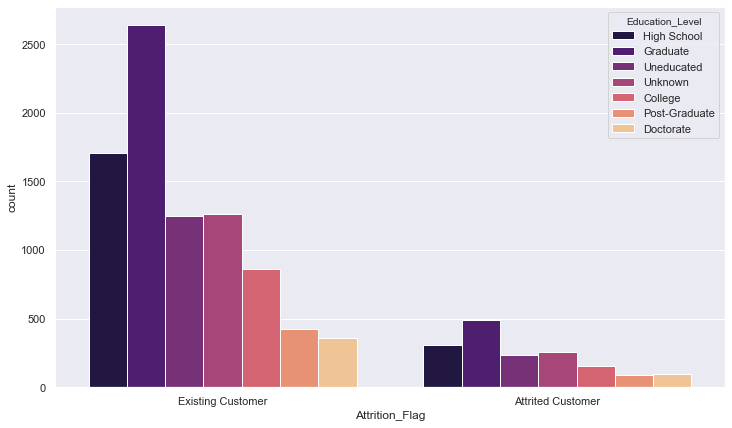

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Education_Level'])

In [ ]:
data['Education_Level'].value_counts(normalize=True)*100

Graduate        30.89
High School     19.88
Unknown         15.00
Uneducated      14.68
College         10.00
Post-Graduate    5.10
Doctorate        4.45
Name: Education_Level, dtype: float64

* The most of participants in the dataset have an education lelev "Graduate" ahead of High School and Unknown and Uneducated

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

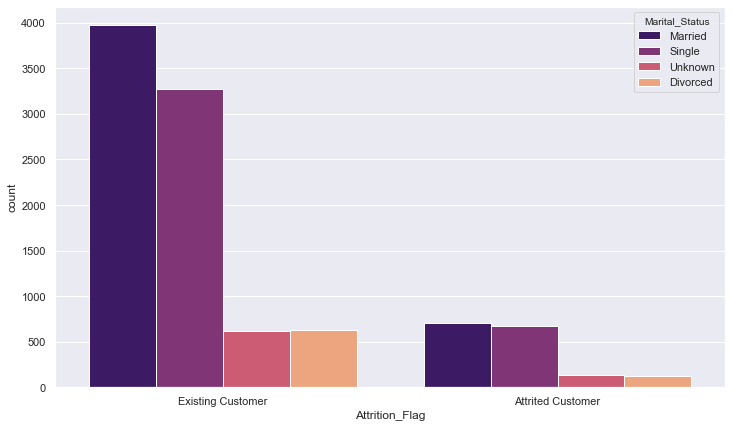

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Marital_Status'])

In [ ]:
data['Marital_Status'].value_counts(normalize=True)*100

Married    46.28
Single     38.94
Unknown     7.40
Divorced    7.39
Name: Marital_Status, dtype: float64

* Married the most common marital status in the dataset with a 46% proportion

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

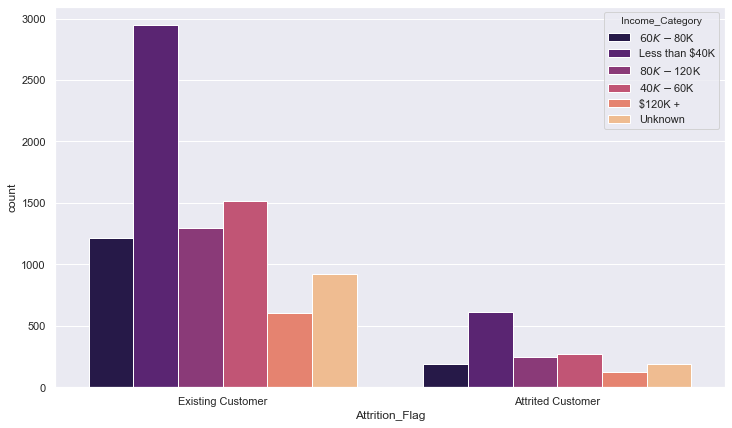

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Income_Category'])

In [ ]:
data['Income_Category'].value_counts(normalize=True)*100

Less than $40K   35.16
$40K - $60K      17.68
$80K - $120K     15.16
$60K - $80K      13.84
Unknown          10.98
$120K +           7.18
Name: Income_Category, dtype: float64

* the most of people has less than 40K USD per year

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

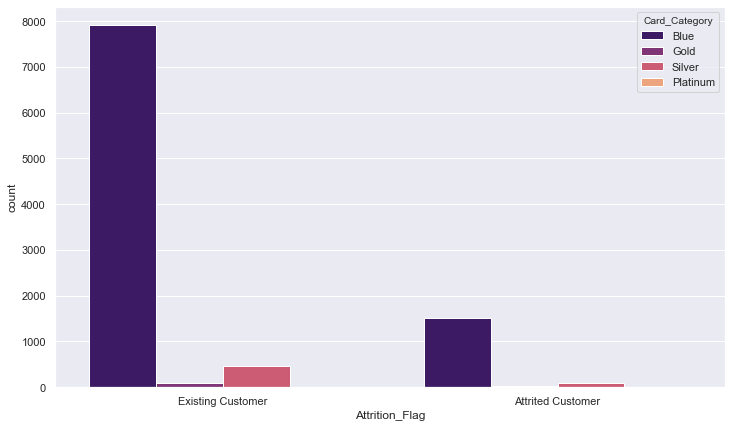

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Card_Category'])

In [ ]:
data['Card_Category'].value_counts(normalize=True)*100

Blue       93.18
Silver      5.48
Gold        1.15
Platinum    0.20
Name: Card_Category, dtype: float64

* Among the credit card categories is the blue one the most popular I suppose this could be combinated with lower salary level

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

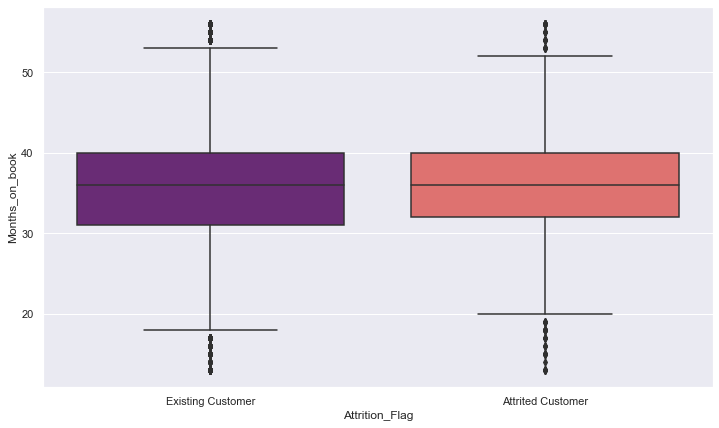

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=data, orient="vertical", palette='magma')

* relationship with the bank shows no differencies between the existing and attrited customers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

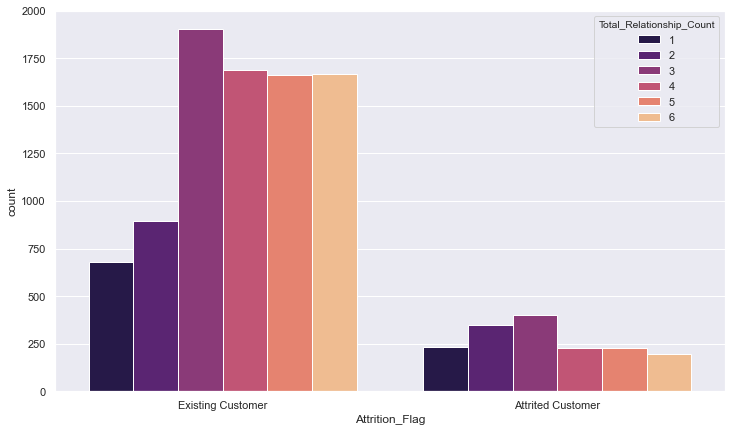

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Total_Relationship_Count'])

* get more products helps to stay customer and not to leave the company

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

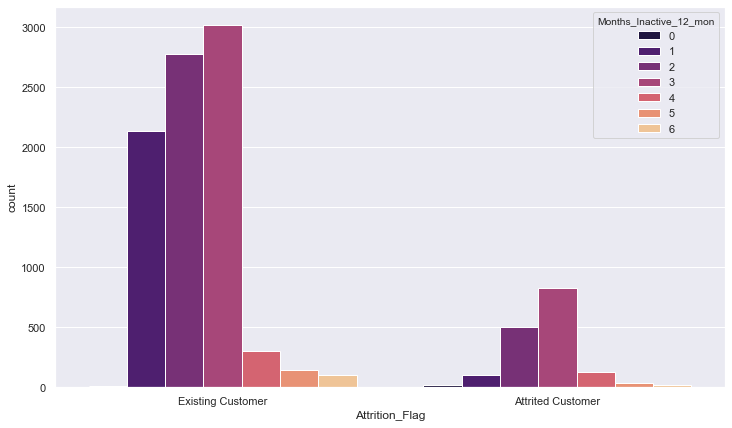

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Months_Inactive_12_mon'])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

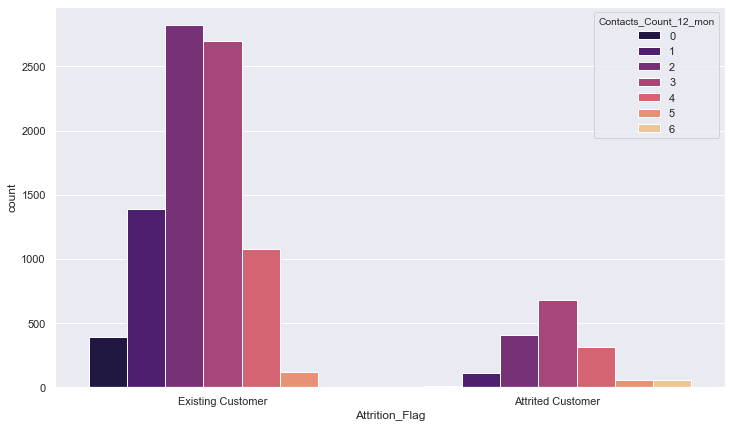

In [ ]:
sns.set(rc={"figure.figsize": (12, 7)})
sns.countplot(x=data["Attrition_Flag"], palette='magma', hue=data['Contacts_Count_12_mon'])

* 2-3 contacts with the bank in the last 12 months shows a positive result

In [ ]:
data.sample(5)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1824  Existing Customer            34      M                2         Unknown   
4703  Existing Customer            54      M                2         Unknown   
7290  Attrited Customer            43      F                4      Uneducated   
1430  Attrited Customer            45      M                3        Graduate   
927   Existing Customer            57      M                2        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
1824        Married     $60K - $80K          Blue              36   
4703         Single         $120K +          Blue              36   
7290       Divorced  Less than $40K          Blue              33   
1430         Single     $60K - $80K          Blue              32   
927         Married    $80K - $120K          Blue              47   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1824                         5                       2                      4   
4703                         5                       1                      2   
7290                         6                       3                      1   
1430                         2                       3                      2   
927                          6                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  \
1824       2379.00                 1982           397.00             2966   
4703      19865.00                    0         19865.00             4350   
7290       1706.00                    0          1706.00             2371   
1430      13162.00                    0         13162.00             1424   
927        2092.00                 1387           705.00             1468   

      Total_Trans_Ct  
1824              50  
4703              83  
7290              45  
1430              38  
927               30

<AxesSubplot:>

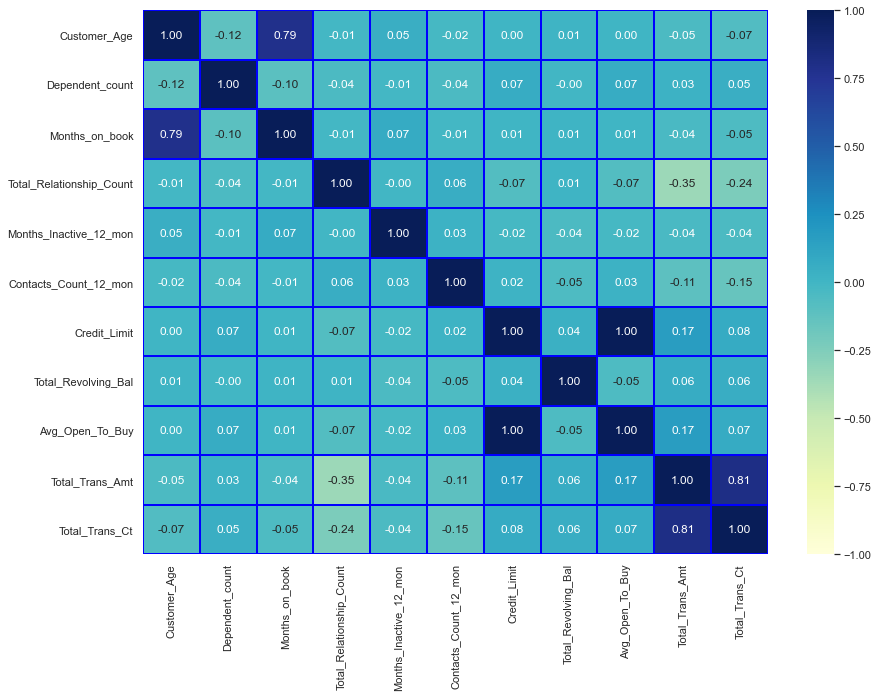

In [ ]:
plt.figure(figsize=(14,10))

sns.heatmap(data.corr(), vmin=-1,vmax=1, annot=True, linecolor='blue',linewidths=2,fmt='.2f', cmap="YlGnBu")

* there is a correlation between Credit Limit and average open to buy
* Total Transaction Amount is also corralated with Total Transaction Count
* Period of relationship with the bank shows a moderate correlation with customer age
* Other independent variables show no cerreltion with each other

In [ ]:
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Customer_Age are :
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Dependent_count are :
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtyp

# Data preprocessing

* Missing value Treatment - there is no missing value in the dataset
* Outlier Detection - XGBoost model is sensible for outliers so I detect and handle it
* Feature Engineering - create dummy data from object (not numerical) columns
* Prepare data for modeling - Traintest splitting

### Check and handle outliers

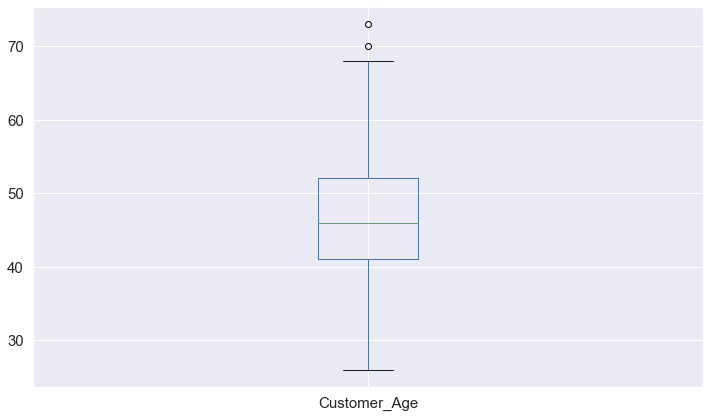

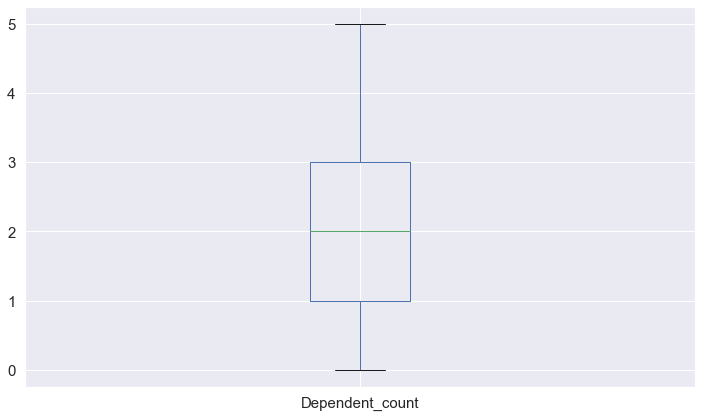

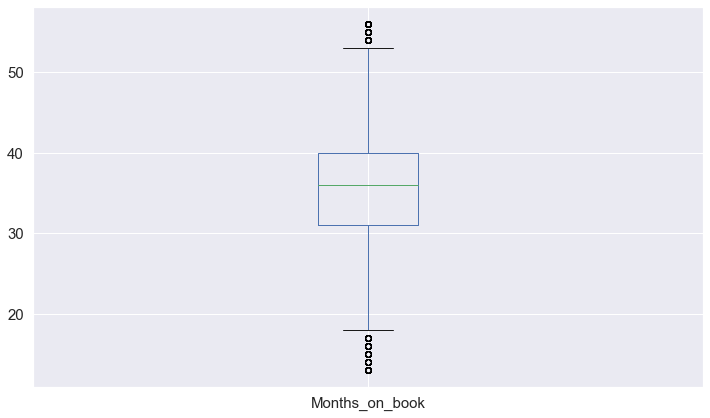

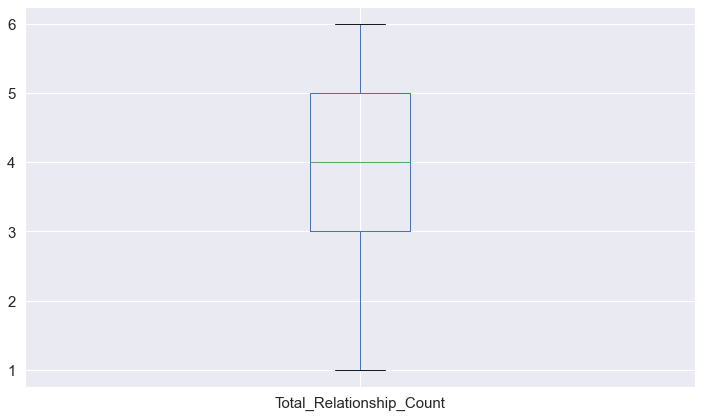

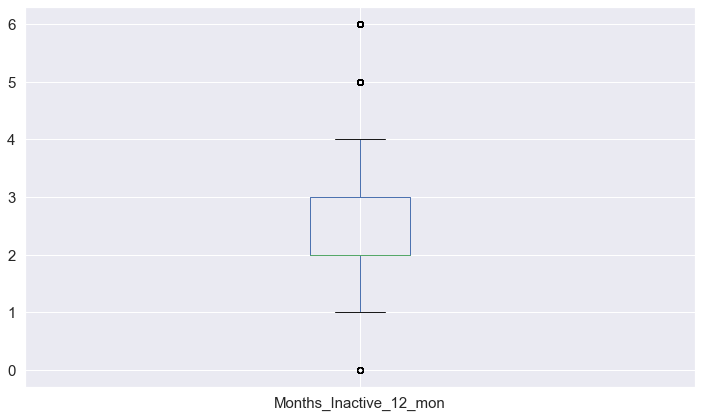

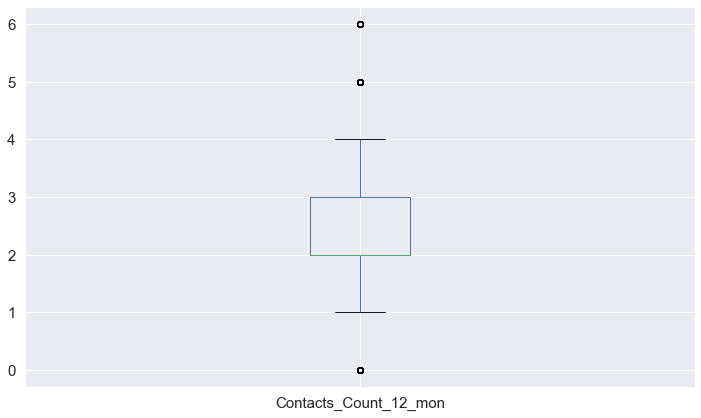

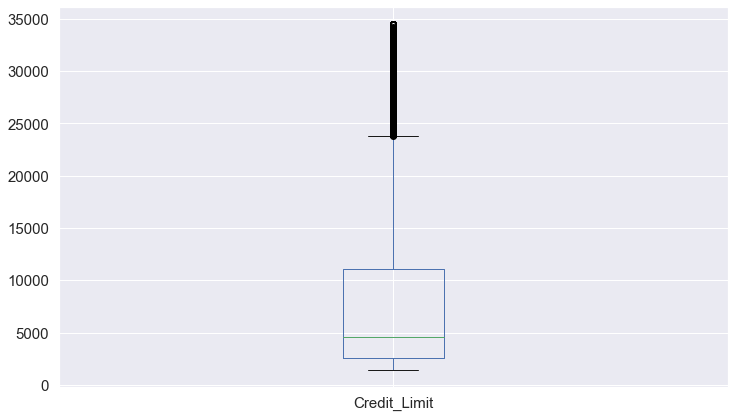

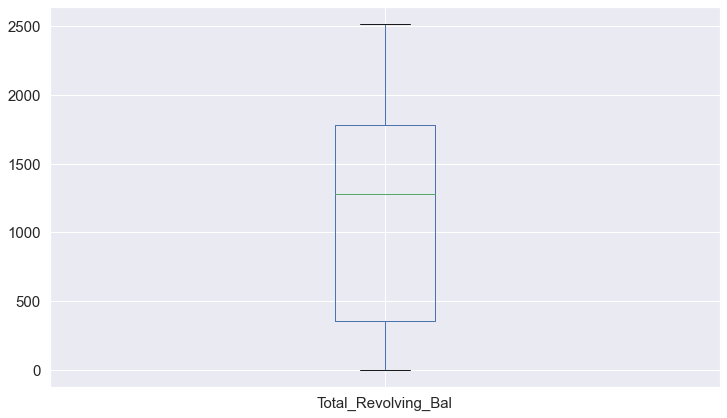

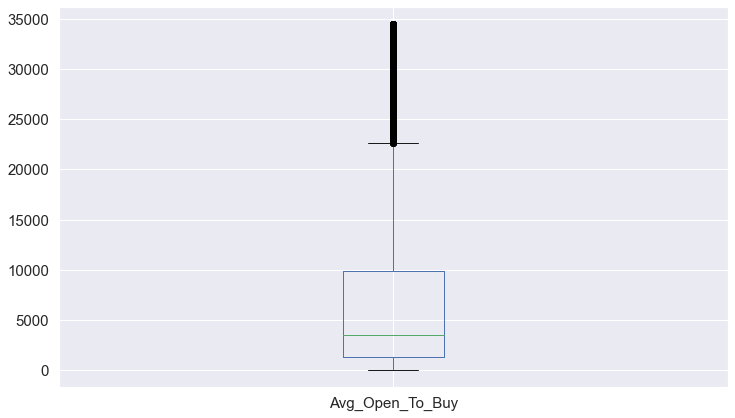

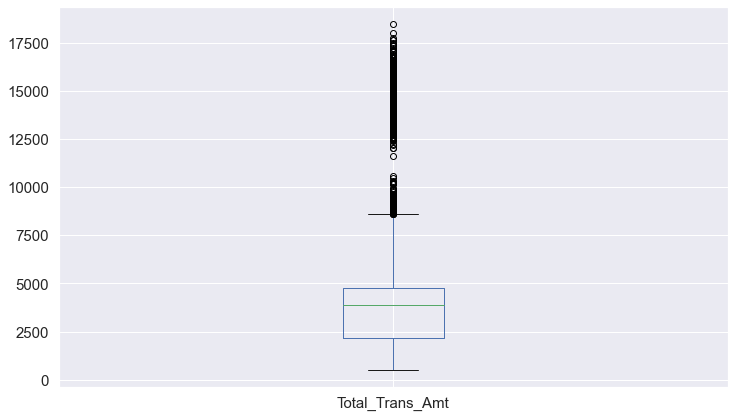

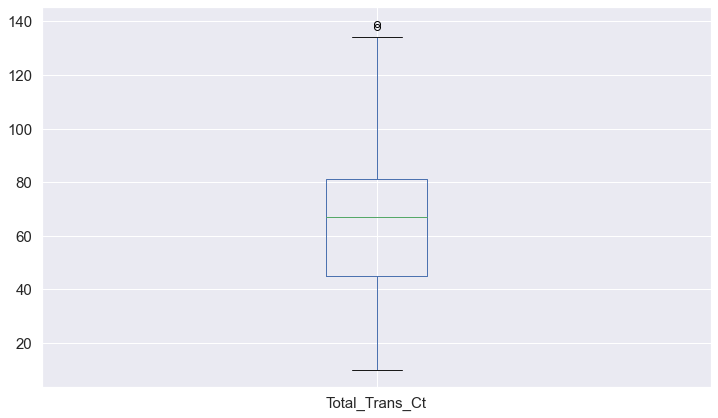

In [ ]:
df_outl=[]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i, c in enumerate(data.columns):
    if (data[c].dtype in numerics)==True:
        df_outl.append(data[c].name)
        plt.figure(i)
        data[c].plot(kind='box', subplots=True, layout=(4,4), fontsize=15, figsize = (30, 30))

In [ ]:
df_outl

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct']

## create a second dataset and remove the outliers from it to prepare for XGBoost

In [ ]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [ ]:
data_o=data.copy()
data_o = treat_outliers_all(data_o,df_outl)

In [ ]:
data_o.sample(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
6958  Existing Customer         42.00      M                1        Graduate   
2702  Existing Customer         54.00      M                3         Unknown   
5536  Existing Customer         47.00      F                3     High School   
4810  Existing Customer         52.00      M                3      Uneducated   
4793  Existing Customer         39.00      F                2        Graduate   
1978  Existing Customer         38.00      F                1        Graduate   
9389  Attrited Customer         45.00      M                5     High School   
9477  Existing Customer         31.00      M                1     High School   
7848  Existing Customer         33.00      F                2       Doctorate   
8472  Attrited Customer         34.00      M                2     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
6958         Single     $60K - $80K          Blue           37.00   
2702        Married    $80K - $120K          Blue           41.00   
5536         Single     $40K - $60K          Blue           34.00   
4810        Unknown         $120K +          Blue           45.00   
4793         Single     $40K - $60K          Blue           36.00   
1978        Married     $40K - $60K          Blue           20.00   
9389       Divorced         $120K +          Blue           36.00   
9477        Married     $60K - $80K          Blue           24.00   
7848         Single  Less than $40K          Blue           26.00   
8472        Married    $80K - $120K          Blue           25.00   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6958                         4                    1.00                   1.00   
2702                         3                    3.00                   2.00   
5536                         4                    1.00                   3.00   
4810                         4                    1.00                   2.00   
4793                         5                    1.00                   1.00   
1978                         5                    1.00                   3.00   
9389                         2                    3.00                   2.00   
9477                         2                    1.00                   3.00   
7848                         2                    3.00                   2.00   
8472                         6                    2.00                   0.50   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  \
6958       2596.00                 1210          1386.00          4642.00   
2702      10448.00                 1569          8879.00          1604.00   
5536       1963.00                 1524           439.00          3492.00   
4810      18096.00                 2404         15692.00          3880.00   
4793      11314.00                    0         11314.00          3761.00   
1978       5153.00                 2517          2636.00          3095.00   
9389       5287.00                    0          5287.00          8392.00   
9477       4328.00                 1493          2835.00          8619.25   
7848       1438.30                    0          1438.30          4196.00   
8472       1439.00                    0          1439.00          2932.00   

      Total_Trans_Ct  
6958              78  
2702              39  
5536              59  
4810              68  
4793              70  
1978              63  
9389              69  
9477             120  
7848              87  
8472              44

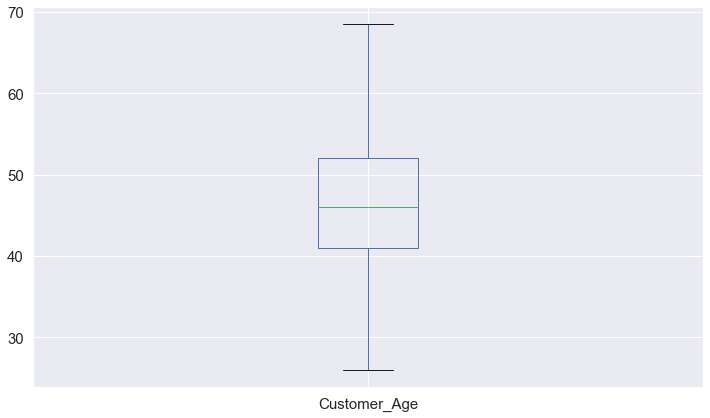

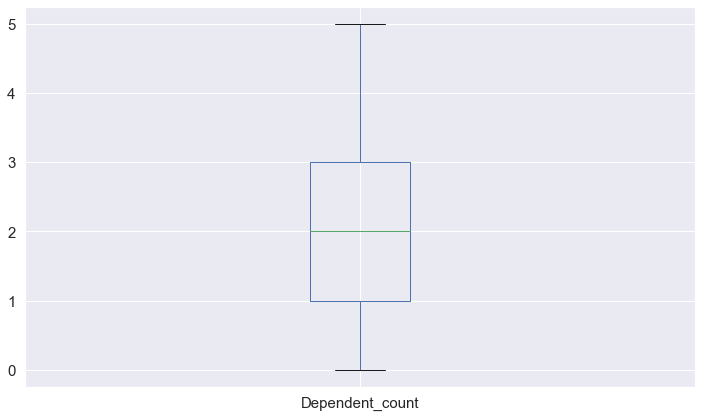

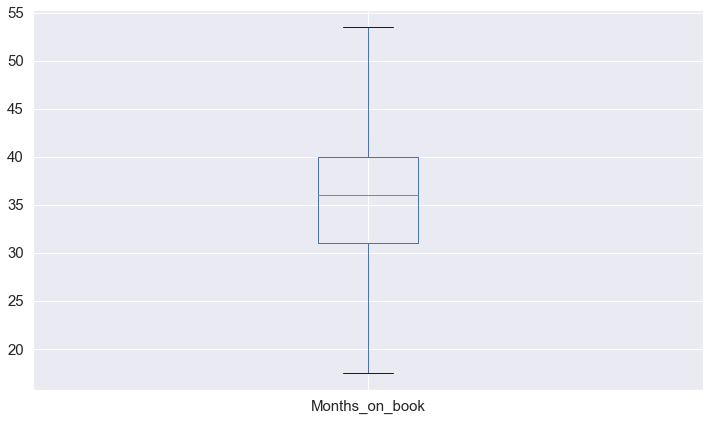

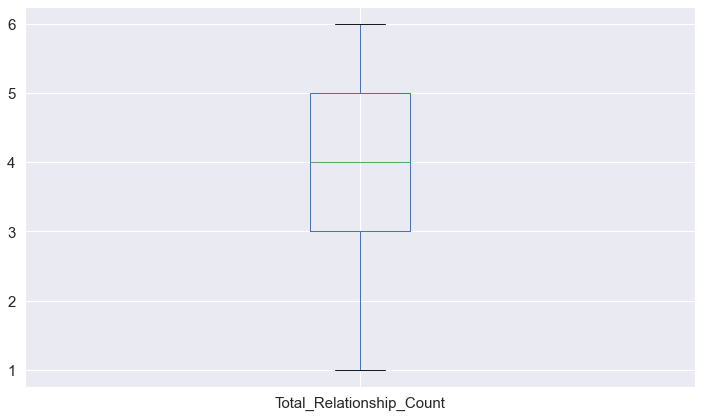

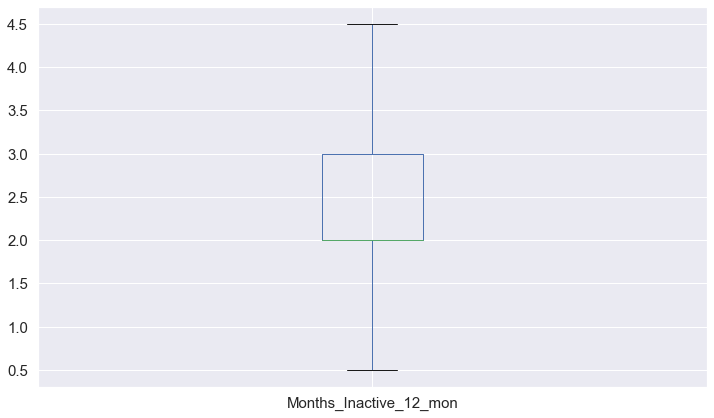

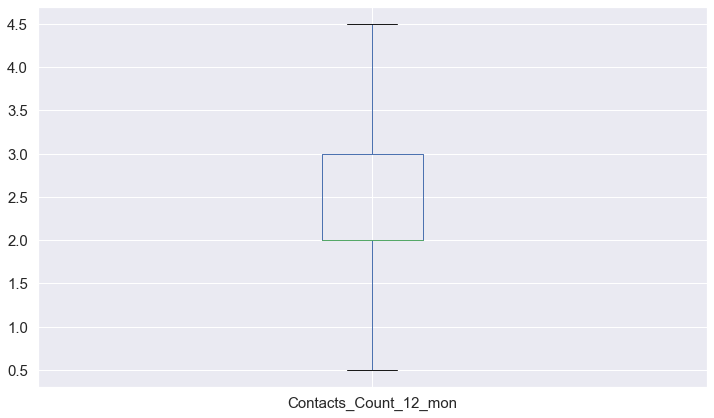

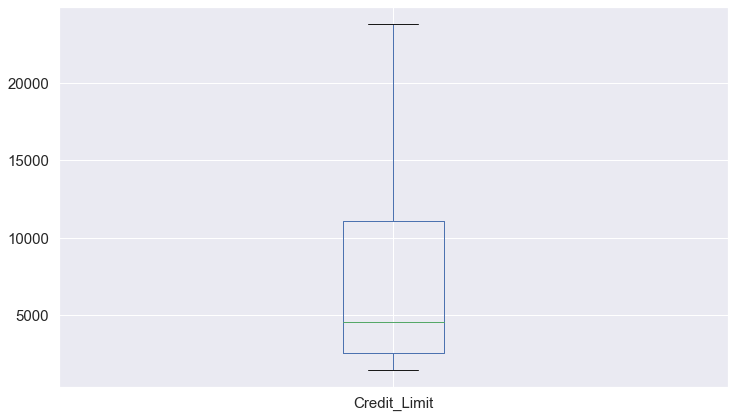

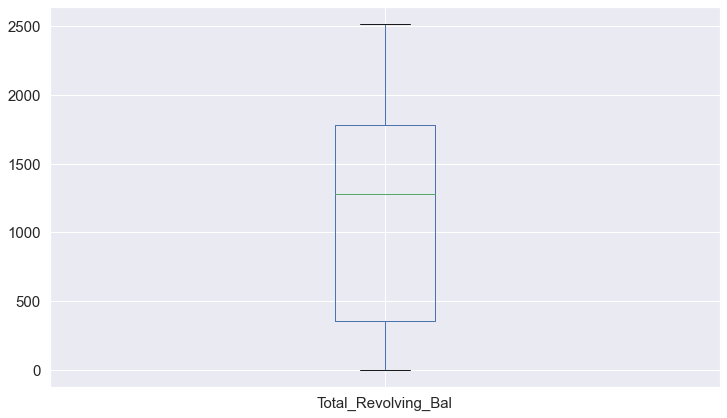

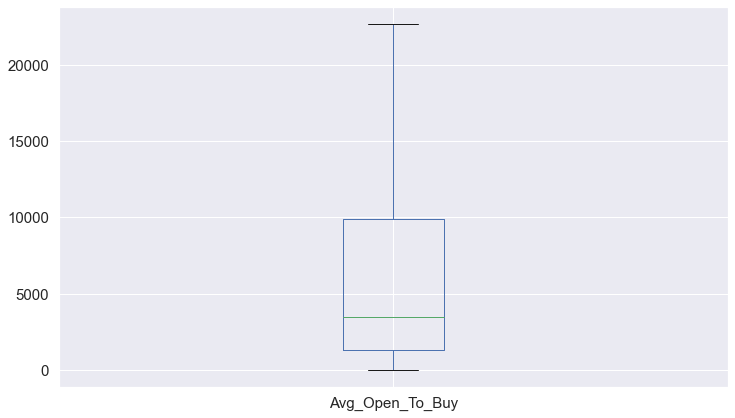

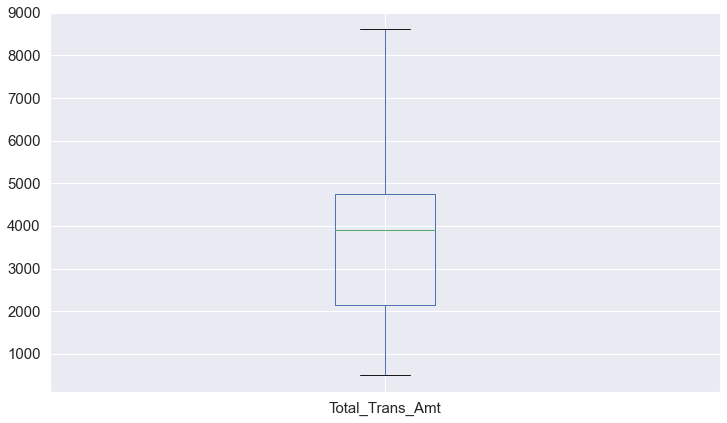

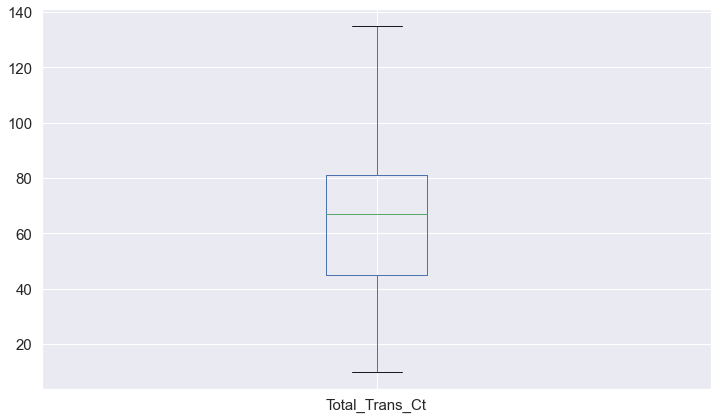

In [ ]:
df_outl=[]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i, c in enumerate(data_o.columns):
    if (data_o[c].dtype in numerics)==True:
        plt.figure(i)
        data_o[c].plot(kind='box', subplots=True, layout=(4,4), fontsize=15, figsize = (30, 30))

* outliers are succefully removed

### Feature Engineering

In [ ]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

In [ ]:
X=data.drop(['Attrition_Flag'], axis=1)
y=data['Attrition_Flag'].apply(lambda x:1 if x=="Existing Customer" else 0)
X_o=data_o.drop(['Attrition_Flag'], axis=1)
y_o=data_o['Attrition_Flag'].apply(lambda x:1 if x=="Existing Customer" else 0)

In [ ]:
X.sample(10)

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
4033            65      M                0       Doctorate         Single   
9575            59      F                1      Uneducated        Married   
8411            26      F                0      Uneducated        Unknown   
8377            49      F                1        Graduate        Married   
6901            60      F                1        Graduate         Single   
3746            45      F                3   Post-Graduate       Divorced   
3013            53      F                1     High School         Single   
9091            44      F                1         Unknown       Divorced   
3911            49      F                5      Uneducated        Married   
7047            61      M                0        Graduate        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
4033  Less than $40K          Blue              52                         3   
9575     $40K - $60K          Blue              36                         2   
8411         Unknown        Silver              13                         1   
8377         Unknown          Blue              39                         1   
6901     $40K - $60K          Blue              42                         3   
3746  Less than $40K          Blue              28                         3   
3013  Less than $40K          Blue              41                         6   
9091  Less than $40K        Silver              34                         1   
3911  Less than $40K          Blue              36                         6   
7047     $60K - $80K          Blue              56                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
4033                       3                      4       3675.00   
9575                       2                      3       3720.00   
8411                       2                      3      34516.00   
8377                       1                      3       5455.00   
6901                       2                      1       3334.00   
3746                       4                      3       5216.00   
3013                       2                      2       8693.00   
9091                       1                      3      13259.00   
3911                       2                      4       2331.00   
7047                       2                      3       9918.00   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  
4033                    0          3675.00             3798              53  
9575                 1569          2151.00            16208             129  
8411                 2403         32113.00             4174              59  
8377                 2091          3364.00             4349              58  
6901                 1151          2183.00             4791             101  
3746                 1519          3697.00             3434              49  
3013                  796          7897.00             4755              69  
9091                  866         12393.00             8998             102  
3911                 1798           533.00             4061              66  
7047                  850          9068.00             2485              40

In [ ]:
y.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
y.sample(10)

2777    1
5532    1
7110    1
2539    1
9303    1
4793    1
3217    1
8412    1
7533    1
2586    1
Name: Attrition_Flag, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.3, random_state=1,stratify=y)

In [ ]:
print("Train shape {}, test shape {}" .format(X_train.shape,X_test.shape))

Train shape (7088, 16), test shape (3039, 16)


In [ ]:
print("Train shape {}, test shape {}" .format(X_train_o.shape,X_test_o.shape))

Train shape (7088, 16), test shape (3039, 16)


In [ ]:
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct            

* there is no missing values in the train data set

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# cols = X_train.select_dtypes(include=['object'])
for i,c in enumerate (X_train.columns):
     print(X_train[c].value_counts())
     print('+'*50)
        

49    352
44    342
45    333
50    333
48    333
47    330
43    326
46    324
42    311
51    290
41    271
52    261
40    253
53    248
39    236
38    222
54    222
55    191
56    188
37    176
36    160
57    150
35    135
59    119
58    111
34     92
33     89
60     88
65     75
32     72
61     67
62     65
31     59
26     58
30     47
63     45
29     38
64     25
28     22
27     21
67      3
68      2
70      1
66      1
73      1
Name: Customer_Age, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
F    3773
M    3315
Name: Gender, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
3    1896
2    1838
1    1303
4    1097
0     651
5     303
Name: Dependent_count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Graduate         2190
High School      1414
Uneducated       1054
Unknown          1049
College           705
Post-Graduate     354
Doctorate         322
Name: Education_Level, dtype: int64
+++++++++++++++++++++++++++++++

### encoding categorical variables

In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* 32 columns after the encoding categorical columns

In [ ]:
X_train_o=pd.get_dummies(X_train_o,drop_first=True)
X_test_o=pd.get_dummies(X_test_o,drop_first=True)
print(X_train_o.shape, X_test_o.shape)

(7088, 29) (3039, 29)


In [ ]:
X_train

Customer_Age  Dependent_count  Months_on_book  \
678              51                1              39   
7524             41                3              36   
8725             53                2              49   
10029            42                3              36   
1383             27                0              17   
...             ...              ...             ...   
509              45                3              36   
8365             38                1              36   
7169             34                1              23   
6113             35                1              24   
10034            56                4              36   

       Total_Relationship_Count  Months_Inactive_12_mon  \
678                           3                       3   
7524                          2                       3   
8725                          1                       2   
10029                         3                       2   
1383                          5                       1   
...                         ...                     ...   
509                           3                       3   
8365                          1                       2   
7169                          4                       1   
6113                          5                       3   
10034                         6                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
678                        2       8796.00                 2517   
7524                       1      13733.00                    0   
8725                       3       9678.00                 1710   
10029                      5      23981.00                 1399   
1383                       2       4610.00                    0   
...                      ...           ...                  ...   
509                        3       4028.00                  710   
8365                       3       2148.00                 1103   
7169                       1       2207.00                 1527   
6113                       3       1438.30                    0   
10034                      3       6224.00                    0   

       Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  Gender_M  \
678            6279.00             1195              18         1   
7524          13733.00             1591              30         0   
8725           7968.00             7682              90         0   
10029         22582.00            14840             125         1   
1383           4610.00             2280              49         1   
...                ...              ...             ...       ...   
509            3318.00              791              22         0   
8365           1045.00             4711              64         0   
7169            680.00             4159              64         0   
6113           1438.30             2355              47         0   
10034          6224.00             8979              68         1   

       Education_Level_Doctorate  Education_Level_Graduate  \
678                            0                         1   
7524                           0                         0   
8725                           0                         0   
10029                          0                         1   
1383                           0                         0   
...                          ...                       ...   
509                            0                         0   
8365                           0                         0   
7169                           0                         1   
6113                           0                         0   
10034                          0                         1   

       Education_Level_High School  Education_Level_Post-Graduate  \
678                              0                              0   
7524                             0                              0   
8725                             1     

<hr style="border: none; border-bottom: 3px solid red;">

# Buliding the model

### Criterion for model evaluation

### What can be a wrong prediction?
* to predict for a bank client to renounce the credit card services and in the reality not
* sign somebody to stop credti card services and in the reality woul like to stay as a credit card partner


### Before buliding a model should bulidinge clarify our target
* Attrition_Flag is our target/dependent variable and we have to predict so accurately as possible the output value (0: attrited customer, 1: existing cusmtomer)
* Regrading our target is the most important increase the True Positiv values from the confusion matrix thar means we have to focus on the <strong> Recall </strong> 

### how can we reduce the missprediction of the clients?
* Greater Recall leads to better prediction result

# Models

* logistic regression
* logistic regression - oversampling
* logistic regression - estimator (regularized model)
* logistic regression - undersampling

### Bagging and Boosting
* Decision tree
* random forest

### bagging classifier models 
* Xgboost
* AdaBoost
* gradient boosting

## Tuned models
<i> I have choosen this model because they are the highest Recall value and it is the most important indicator in the model building </i>
### grid search

* Gradient Boost model - with pipeline
* random forest - with pipeline
* Xgboost - with pipeline

### random search

* Gradient Boost model - with pipeline
* random forest - with pipeline
* Xgboost - with pipeline

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

<hr style="border: none; border-bottom: 3px solid red;">

### logistic regression

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

#### Evaluate the model performance with KFold and cross_val_score

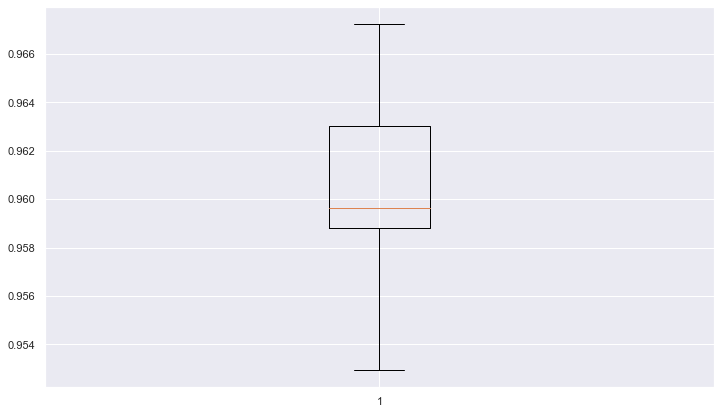

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.8740124153498872
Accuracy on test set :  0.8736426456071076
Recall on training set :  0.9646999495713565
Recall on test set :  0.9670717365738926
Precision on training set :  0.8936468389909685
Precision on test set :  0.8915793277918324


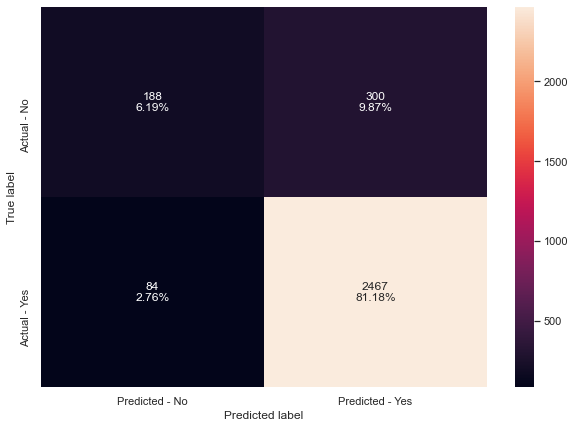

In [ ]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)# ,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

<hr style="border: none; border-bottom: 3px solid red;">

### Oversampling train data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before UpSampling, counts of label 'Existing Customer': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Existing Customer': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))


Before UpSampling, counts of label 'Existing Customer': 5949
Before UpSampling, counts of label 'Attrited Customer': 1139 

After UpSampling, counts of label 'Existing Customer': 5949
After UpSampling, counts of label 'Attrited Customer': 5949 

After UpSampling, the shape of train_X: (11898, 29)
After UpSampling, the shape of train_y: (11898,) 



In [ ]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

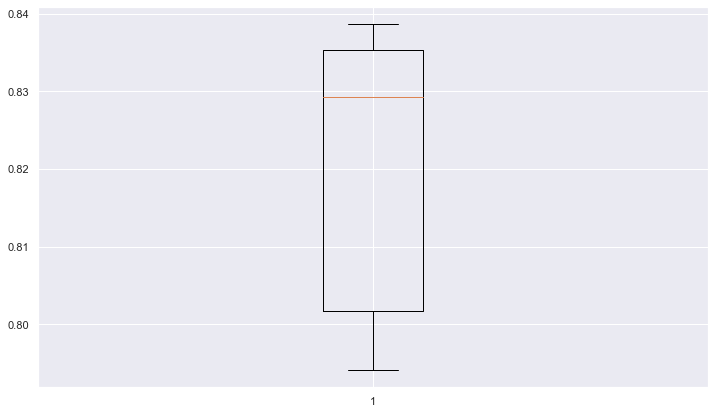

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Accuracy on training set :  0.7968397291196389
Accuracy on test set :  0.790720631786772
Recall on training set :  0.8008068582955119
Recall on test set :  0.8008624068992551
Precision on training set :  0.949193066347878
Precision on test set :  0.9410409949332105


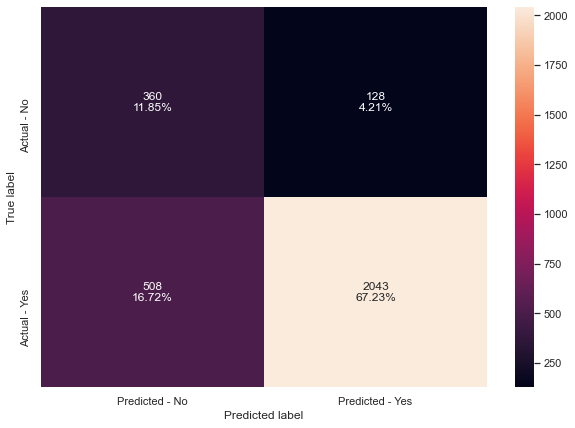

In [ ]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

### Regularization

In [ ]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.8043171557562077
Accuracy on test set :  0.8068443566962816
Recall on training set :  0.8525802655908556
Recall on test set :  0.8573108584868679
Precision on training set :  0.9086348978860623
Precision on test set :  0.9074688796680498


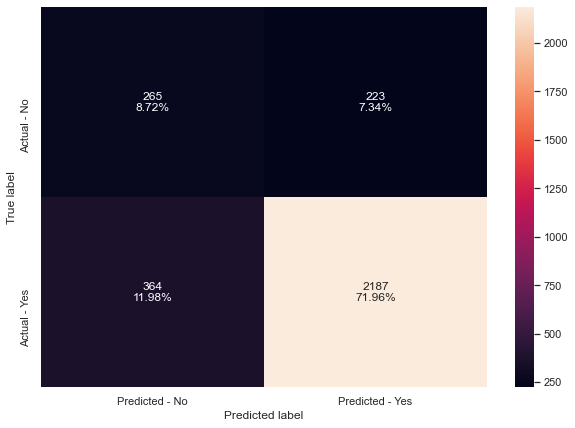

In [ ]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

### Undersampling train data using SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Existing Customer': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Existing Customer': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Existing Customer': 5949
Before Under Sampling, counts of label 'Attrited Customer': 1139 

After Under Sampling, counts of label 'Existing Customer': 1139
After Under Sampling, counts of label 'Attrited Customer': 1139 

After Under Sampling, the shape of train_X: (2278, 29)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [ ]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

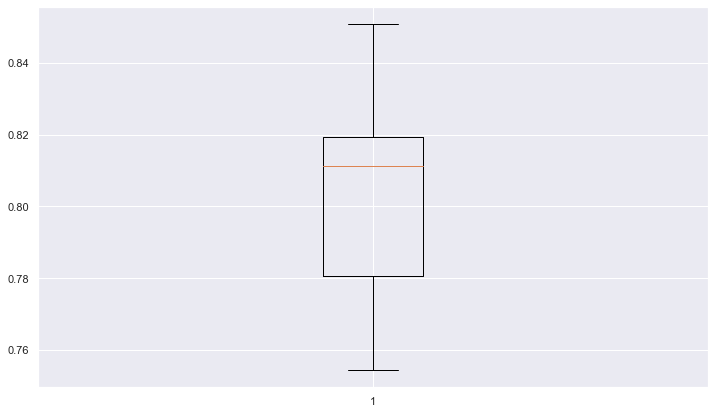

In [ ]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.7851297968397292
Accuracy on test set :  0.7745969068772622
Recall on training set :  0.7809715918641789
Recall on test set :  0.7714621716973736
Precision on training set :  0.9547883271681052
Precision on test set :  0.9507246376811594


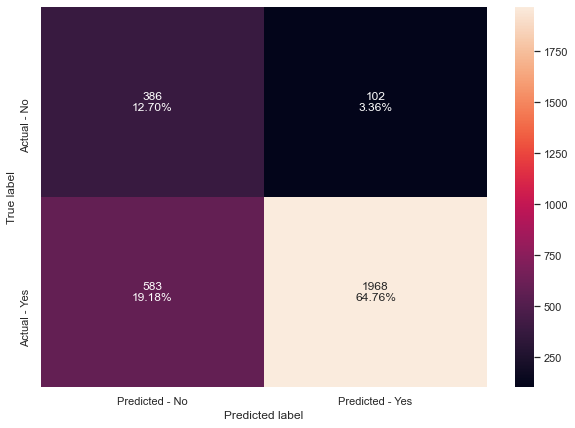

In [ ]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train,X_test,y_train,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

In [ ]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

### Finding the coefficients

In [ ]:
log_odds = log_reg_under.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).T

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
coef         -0.15            -0.14            0.10                      0.05   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
coef                   -0.15                  -0.20          0.00   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  \
coef                 0.00            -0.00            -0.00            0.09   

      Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
coef      0.01                      -0.00                     -0.01   

      Education_Level_High School  Education_Level_Post-Graduate  \
coef                         0.00                          -0.00   

      Education_Level_Uneducated  Education_Level_Unknown  \
coef                       -0.00                    -0.01   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
coef                    0.01                  -0.02                   -0.01   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
coef                        -0.00                         0.00   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
coef                          0.00                           -0.02   

      Income_Category_Unknown  Card_Category_Gold  Card_Category_Platinum  \
coef                    -0.01               -0.00                   -0.00   

      Card_Category_Silver  
coef                 -0.00

### Coefficient interpretations

* coefficients like customer age, dependent count, inactive months, contact counts decrease the chance to stay customer at the bank
* the relationship, transactions increase so help to stay as cusmoer at the bank

<hr style="border: none; border-bottom: 3px solid red;">

# Model building - Bagging and Boosting

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

<hr style="border: none; border-bottom: 3px solid red;">

## decision tree

In [ ]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

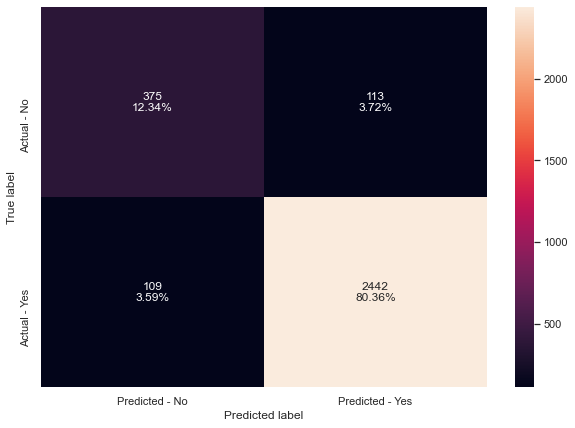

In [ ]:
make_confusion_matrix(dtree,y_test)

In [ ]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.926949654491609
Recall on training set :  1.0
Recall on test set :  0.9572716581732654
Precision on training set :  1.0
Precision on test set :  0.9557729941291585


* the decision tree model is overfitted and shows not too good result in Recall

<hr style="border: none; border-bottom: 3px solid red;">

## random forest

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

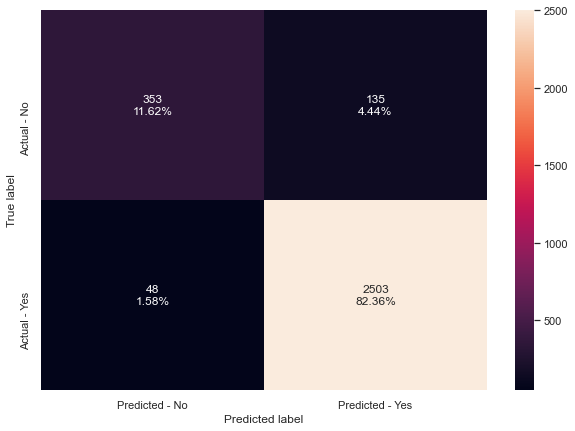

In [ ]:
make_confusion_matrix(rf,y_test)

In [ ]:
rf_score=get_metrics_score(rf,X_train,X_test,y_train,y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.9397828232971372
Recall on training set :  1.0
Recall on test set :  0.9811838494707957
Precision on training set :  1.0
Precision on test set :  0.9488248673237301


* light overfitting in the random forest model, the recall value in the test set is not bad have to try to improve with tuning

<hr style="border: none; border-bottom: 3px solid red;">

## Bagging classifier models - Xgboost, AdaBoost, and Gradient boosting models

### XGBoost model

In [ ]:
xgb=XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train_o,y_train_o)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

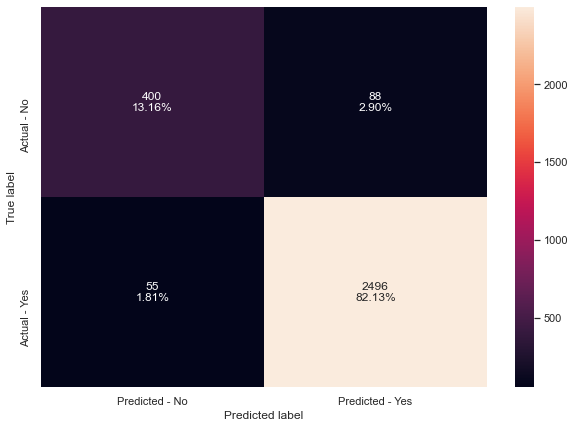

In [ ]:
make_confusion_matrix(xgb,y_test_o)

In [ ]:
get_metrics_score(xgb,X_train_o,X_test_o,y_train_o,y_test_o)

Accuracy on training set :  1.0
Accuracy on test set :  0.9529450477130635
Recall on training set :  1.0
Recall on test set :  0.9784398275186201
Precision on training set :  1.0
Precision on test set :  0.9659442724458205


[1.0, 0.9529450477130635, 1.0, 0.9784398275186201, 1.0, 0.9659442724458205]

* the model without tuning is overfitted have to be tuned to research for a beetter researchesult

<hr style="border: none; border-bottom: 3px solid red;">

### ADABoost model

In [ ]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

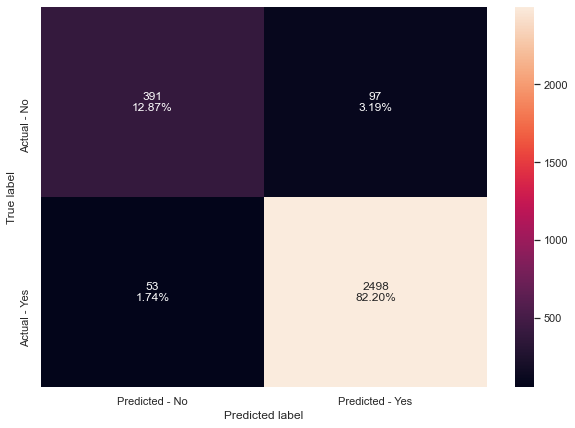

In [ ]:
make_confusion_matrix(ada,y_test)

In [ ]:
get_metrics_score(ada,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9565462753950339
Accuracy on test set :  0.9506416584402764
Recall on training set :  0.9808371154815936
Recall on test set :  0.9792238337906704
Precision on training set :  0.9678221927351136
Precision on test set :  0.9626204238921002


[0.9565462753950339,
 0.9506416584402764,
 0.9808371154815936,
 0.9792238337906704,
 0.9678221927351136,
 0.9626204238921002]

<hr style="border: none; border-bottom: 3px solid red;">

### Gardient Boost model

In [ ]:
grd=GradientBoostingClassifier()
grd.fit(X_train, y_train)

GradientBoostingClassifier()

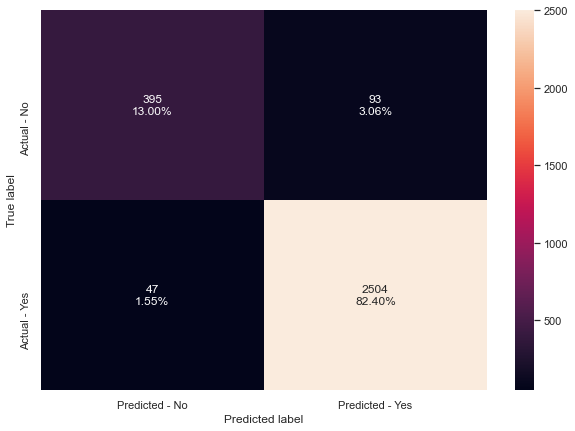

In [ ]:
make_confusion_matrix(grd,y_test)

In [ ]:
get_metrics_score(grd,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9668453724604966
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9878971255673222
Recall on test set :  0.9815758526068209
Precision on training set :  0.9730132450331126
Precision on test set :  0.9641894493646516


[0.9668453724604966,
 0.953932214544258,
 0.9878971255673222,
 0.9815758526068209,
 0.9730132450331126,
 0.9641894493646516]

<hr style="border: none; border-bottom: 3px solid red;">

## Comparison of models

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
# defining list of models
models = [lr, log_reg_over, lr_estimator, log_reg_under, dtree, rf, xgb, ada, grd]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Logistic Regression - oversampled",
            "Logistic Regression - estimator",
            "Logistic Regression - undersampled",
            "Decision Tree",
            "Random Forest",
            "XGBoost",
            "ADABoost",
            "Gradient Boost"          
            ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
8                      Gradient Boost          0.9668         0.9539   
5                       Random Forest          1.0000         0.9398   
7                            ADABoost          0.9565         0.9506   
6                             XGBoost          1.0000         0.9529   
0                 Logistic Regression          0.8740         0.8736   
4                       Decision Tree          1.0000         0.9269   
2     Logistic Regression - estimator          0.8043         0.8068   
1   Logistic Regression - oversampled          0.7968         0.7907   
3  Logistic Regression - undersampled          0.7851         0.7746   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
8        0.9879       0.9816           0.9730          0.9642  
5        1.0000       0.9812           1.0000          0.9488  
7        0.9808       0.9792           0.9678          0.9626  
6        1.0000       0.9784           1.0000          0.9659  
0        0.9647       0.9671           0.8936          0.8916  
4        1.0000       0.9573           1.0000          0.9558  
2        0.8526       0.8573           0.9086          0.9075  
1        0.8008       0.8009           0.9492          0.9410  
3        0.7810       0.7715           0.9548          0.9507

## Conclusion of comparison models without hyperparameters tuning
* Gradient Boost, Random Forest, AdaBoost and XGBoost are the 4 strongest model regarding the Recall value on our Test set

<hr style="border: none; border-bottom: 3px solid red;">

# Hyperparameter tuning using grid search - for the best 3 models (grid search, random search)

## Grid Search Tuning models

### Gradient Boost model - Grid search tuning

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1)
)

# Grid of parameters to choose from
parameters = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'gradientboostingclassifier__max_features': 1, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__subsample': 1} with CV score=0.9889058668042491:


In [ ]:
# Creating new pipeline with best parameters
grd_tuned = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,max_features=1, n_estimators=100, subsample=1),
)

# Fit the model on training data
grd_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=1, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.9142212189616253
Accuracy on test set :  0.905890095426127
Recall on training set :  0.9902504622625652
Recall on test set :  0.9917679341434732
Precision on training set :  0.9146095326812607
Precision on test set :  0.9051878354203936


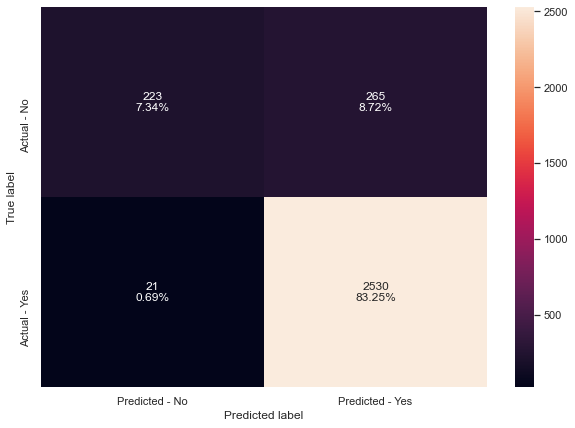

In [ ]:
get_metrics_score(grd_tuned,X_train,X_test,y_train,y_test)
make_confusion_matrix(grd_tuned, y_test)

 * 0.011 from  0.9815 to 0.9925 is the improvement regarding the Recall indicator in comparison with the previous not tuned gradient boost model

<hr style="border: none; border-bottom: 3px solid red;">

### Random forest model - Grid search tuning

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), RandomForestClassifier(random_state=1)
)

# Grid of parameters to choose from
parameters = {
                'randomforestclassifier__max_depth': list(np.arange(5,30,5)) + [None],
                'randomforestclassifier__max_features': ['sqrt','log2',None],
                'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
                'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
                'randomforestclassifier__n_estimators': np.arange(10,110,10)
}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 17, 'randomforestclassifier__n_estimators': 90} with CV score=0.9973105003145075:


In [ ]:
# Creating new pipeline with best parameters
rf_tuned = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=5, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 17, n_estimators= 90)
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features='log2',
                                        min_samples_split=17, n_estimators=90,
                                        random_state=1))])

Accuracy on training set :  0.8991252821670429
Accuracy on test set :  0.8937150378413952
Recall on training set :  0.9971423768700622
Recall on test set :  0.9960799686397491
Precision on training set :  0.8947209653092006
Precision on test set :  0.8903293622985283


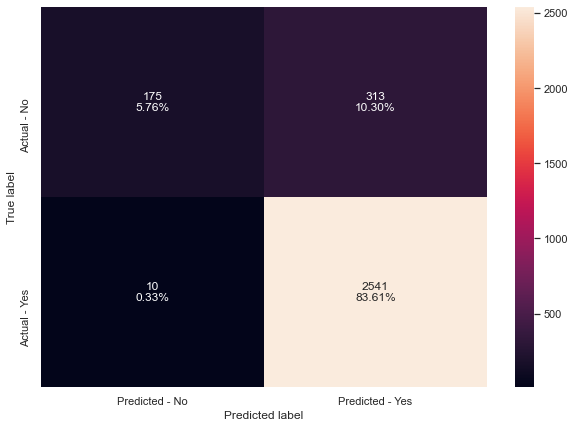

In [ ]:
get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
make_confusion_matrix(rf_tuned, y_test)

* in comparison with the originl (not theuned) model the Recall inndicator is better from 0.9811 to 0.9929 means 0.0118 imporvement

<hr style="border: none; border-bottom: 3px solid red;">

### XGBoost model - Grid search tuning

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
parameters = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_o, y_train_o)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9961341710780192:


In [ ]:
# Creating new pipeline with best parameters
xgb_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(random_state=1,gamma=3, learning_rate= 0.01, n_estimators= 50, scale_pos_weight= 10, subsample= 0.8),
)

# Fit the model on training data
xgb_tuned.fit(X_train_o, y_train_o)

[17:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9174661399548533
Accuracy on test set :  0.9128002632444883
Recall on training set :  0.9996638090435367
Recall on test set :  0.9972559780478244
Precision on training set :  0.9107197549770291
Precision on test set :  0.9079229122055674


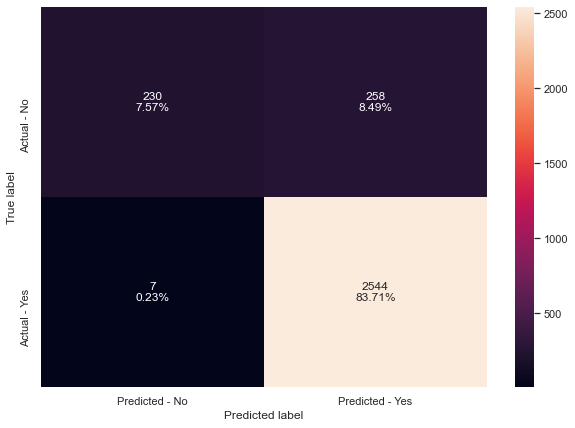

In [ ]:
get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
make_confusion_matrix(xgb_tuned, y_test)

* Recall on the Test set is 0.9972 a very good result and cause a0.0188 imporvement regrding the previous result 0.9784 at the not tuned XGBoost model

<hr style="border: none; border-bottom: 3px solid red;">

## Random Search Tuning models

### Gradient Boost model - Random search tuning

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1)
)

# Grid of parameters to choose from
parameters = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, scoring=scorer,n_iter=20, cv=5,random_state=1)

# Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__max_features': 1} with CV score=0.9889058668042491:


In [ ]:
# Creating new pipeline with best parameters
grd_tuned_rnd = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,subsample= 1, n_estimators= 100, max_features= 1),
)

# Fit the model on training data
grd_tuned_rnd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=1, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.9142212189616253
Accuracy on test set :  0.905890095426127
Recall on training set :  0.9902504622625652
Recall on test set :  0.9917679341434732
Precision on training set :  0.9146095326812607
Precision on test set :  0.9051878354203936


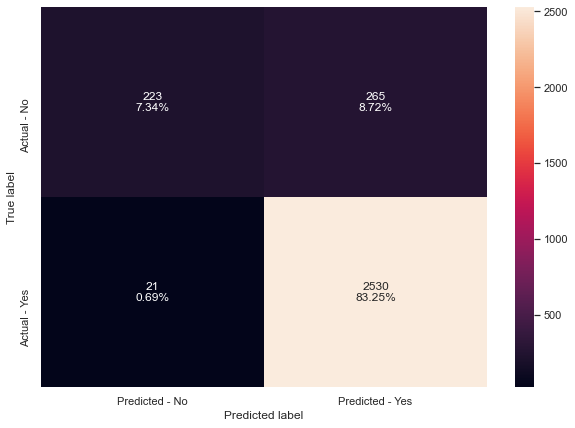

In [ ]:
get_metrics_score(grd_tuned_rnd,X_train,X_test,y_train,y_test)
make_confusion_matrix(grd_tuned_rnd, y_test)

* 0.9918 the same result as the grid search model but more better than without tuning (0.9815)

<hr style="border: none; border-bottom: 3px solid red;">

### Random forest model - Random search tuning

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), RandomForestClassifier(random_state=1)
)

# Grid of parameters to choose from
parameters = {
                'randomforestclassifier__max_depth': list(np.arange(5,30,5)) + [None],
                'randomforestclassifier__max_features': ['sqrt','log2',None],
                'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
                'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
                'randomforestclassifier__n_estimators': np.arange(10,110,10)
}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, scoring=scorer,n_iter=20, cv=5,random_state=1)

# Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 5} with CV score=0.9966382314069445:


In [ ]:
# Creating new pipeline with best parameters
rf_tuned_rnd = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1,n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth= 5),
)

# Fit the model on training data
rf_tuned_rnd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features='log2',
                                            random_state=1))])

Accuracy on training set :  0.9782731376975169
Accuracy on test set :  0.9529450477130635
Recall on training set :  0.9934442763489663
Recall on test set :  0.9851038808310466
Precision on training set :  0.9809128630705394
Precision on test set :  0.9598930481283422


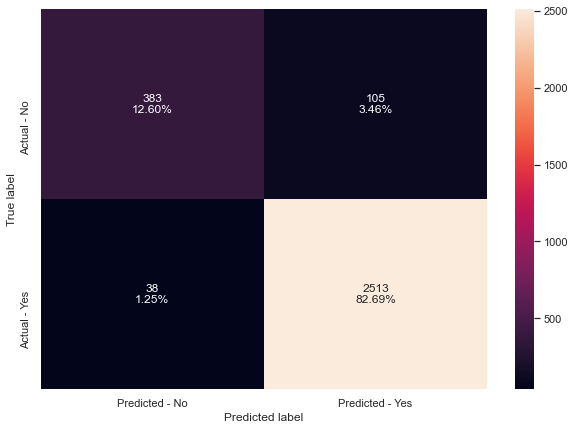

In [ ]:
get_metrics_score(rf_tuned_rnd,X_train,X_test,y_train,y_test)
make_confusion_matrix(rf_tuned_rnd, y_test)

<hr style="border: none; border-bottom: 3px solid red;">

### XGBoost model - Random search tuning

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
parameters = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, scoring=scorer,n_iter=20, cv=5,random_state=1)

# Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_train_o, y_train_o)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=0.9956296866938533:


In [ ]:
# Creating new pipeline with best parameters
xgb_tuned_rnd = make_pipeline(
    StandardScaler(),
    XGBClassifier(random_state=1,subsample= 0.7, scale_pos_weight= 10, n_estimators= 150, learning_rate= 0.05, gamma= 3),
)

# Fit the model on training data
xgb_tuned_rnd.fit(X_train_o, y_train_o)

[17:57:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.965293453724605
Accuracy on test set :  0.9430733794011188
Recall on training set :  1.0
Recall on test set :  0.9952959623676989
Precision on training set :  0.9602905569007264
Precision on test set :  0.9403703703703704


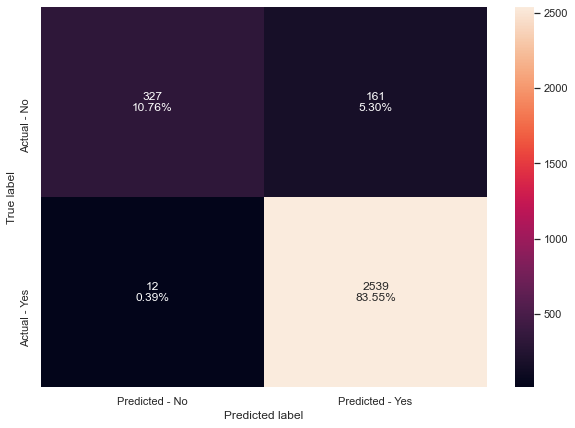

In [ ]:
get_metrics_score(xgb_tuned_rnd,X_train,X_test,y_train,y_test)
make_confusion_matrix(xgb_tuned_rnd, y_test)

<hr style="border: none; border-bottom: 3px solid red;">

# Comparison of all models

In [ ]:
# defining list of models
models = [lr, log_reg_over, lr_estimator, log_reg_under, dtree, rf, rf_tuned, rf_tuned_rnd, xgb,xgb_tuned, xgb_tuned_rnd, ada, grd, grd_tuned, grd_tuned_rnd]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Logistic Regression - oversampled",
            "Logistic Regression - estimator",
            "Logistic Regression - undersampled",
            "Decision Tree",
            "Random Forest",
            "Random Forest - GridSearchCV",
            "Random Forest - RandomizedSearchCV",
            "XGBoost",
            "XGBoost - GridSearchCV",
            "XGBoost - RandomizedSearchCV",
            "ADABoost",
            "Gradient Boost",
            "Gradient Boost - GridSearchCV",
            "Gradient Boost - RandomizedSearchCV"
            
            ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
9                XGBoost - GridSearchCV          0.9175         0.9128   
6          Random Forest - GridSearchCV          0.8991         0.8937   
10         XGBoost - RandomizedSearchCV          0.9653         0.9431   
13        Gradient Boost - GridSearchCV          0.9142         0.9059   
14  Gradient Boost - RandomizedSearchCV          0.9142         0.9059   
7    Random Forest - RandomizedSearchCV          0.9783         0.9529   
12                       Gradient Boost          0.9668         0.9539   
5                         Random Forest          1.0000         0.9398   
11                             ADABoost          0.9565         0.9506   
8                               XGBoost          1.0000         0.9529   
0                   Logistic Regression          0.8740         0.8736   
4                         Decision Tree          1.0000         0.9269   
2       Logistic Regression - estimator          0.8043         0.8068   
1     Logistic Regression - oversampled          0.7968         0.7907   
3    Logistic Regression - undersampled          0.7851         0.7746   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
9         0.9997       0.9973           0.9107          0.9079  
6         0.9971       0.9961           0.8947          0.8903  
10        1.0000       0.9953           0.9603          0.9404  
13        0.9903       0.9918           0.9146          0.9052  
14        0.9903       0.9918           0.9146          0.9052  
7         0.9934       0.9851           0.9809          0.9599  
12        0.9879       0.9816           0.9730          0.9642  
5         1.0000       0.9812           1.0000          0.9488  
11        0.9808       0.9792           0.9678          0.9626  
8         1.0000       0.9784           1.0000          0.9659  
0         0.9647       0.9671           0.8936          0.8916  
4         1.0000       0.9573           1.0000          0.9558  
2         0.8526       0.8573           0.9086          0.9075  
1         0.8008       0.8009           0.9492          0.9410  
3         0.7810       0.7715           0.9548          0.9507

# Analyse model performances

* The Grid serach and the random search tuned model results are much more better as the not tuned models
* Although the GridSearch method are costly brought the best result in XGBoost model
* The calculation speed in the RandomSearch is much more quick and bring a very good result in the XGBoost model 0.995
* The Bagging and Boosting models without tuning show in every case <strong> overfitting </strong> so withou tuning are nor appropriate to use for prediction
* The logistic regression model without tuning method shows a better result than after the tuning but the poor <strong> Recall </strong> performance shows that not this model will be the winner
* decision tree overfitted and has a moderate performance in Recall

<hr style="border: none; border-bottom: 3px solid red;">

# Business recommendations and insights

* to <strong> imporve loyality </strong> regarding to credit card typ should be create a better conditions to reach other credit cards typ (currently it is maninly blue the lowest category) 
* to <strong> make a contact </strong> with the customer has a positiv effect for a long term coperation
* customers who have more products with the bank stay future probably also credit card customer and want not to leave this services so <strong> try to sell more product </strong>
* people with higher salary are not to involved in the dataset so <strong> try to research more </strong> among these customers
